<a href="https://colab.research.google.com/github/DiegoCabreraOsorio/tareas-data-science/blob/main/Tarea2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 - Data Science para Ingeniería Matemática

Estudiantes: Diego Cabrera, Rafael Hernández y Felipe González

## Parte 1 : Reducción de Dimensionalidad (sólo pre-procesamiento)

### Dataset 1: *zalando-research/fashionmnist*

In [ ]:
import kagglehub  #Importamos Kagglehub para descargar el data set

path1 = kagglehub.dataset_download("zalando-research/fashionmnist") #Llamamos path1 donde se descarga el dataset

print("Path to dataset files:", path1)  #Vemos donde se decargó el archivo

Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
import pandas as pd #Importamos pandas para leer el dataset

In [ ]:
df1 = pd.read_csv(path1+"/fashion-mnist_test.csv") #Leemos el dataset

In [ ]:
df1 #Visualizamos el dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Ahora realizamos PCA

In [ ]:
import matplotlib.pyplot as plt #Importamos matplot
import numpy as np  #Importamos Numpy para calculos
from sklearn.decomposition import PCA #Importamos scikitlearn pca
from sklearn.preprocessing import StandardScaler  #Importamos Scikitlearn standarscaler

In [ ]:
np.random.seed(42)  #Fijamos una semilla

In [ ]:
X = df1.drop("label", axis=1)  # Dejamos X como solo pixeles
y = df1["label"]               # Separamos las etiquetas de clases
images = X.values.reshape(-1, 28, 28) # Pasamos los pixeles a imagenes cuadradas como se describen en kaggle

In [ ]:
X #Visualizamos solo los pixeles

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


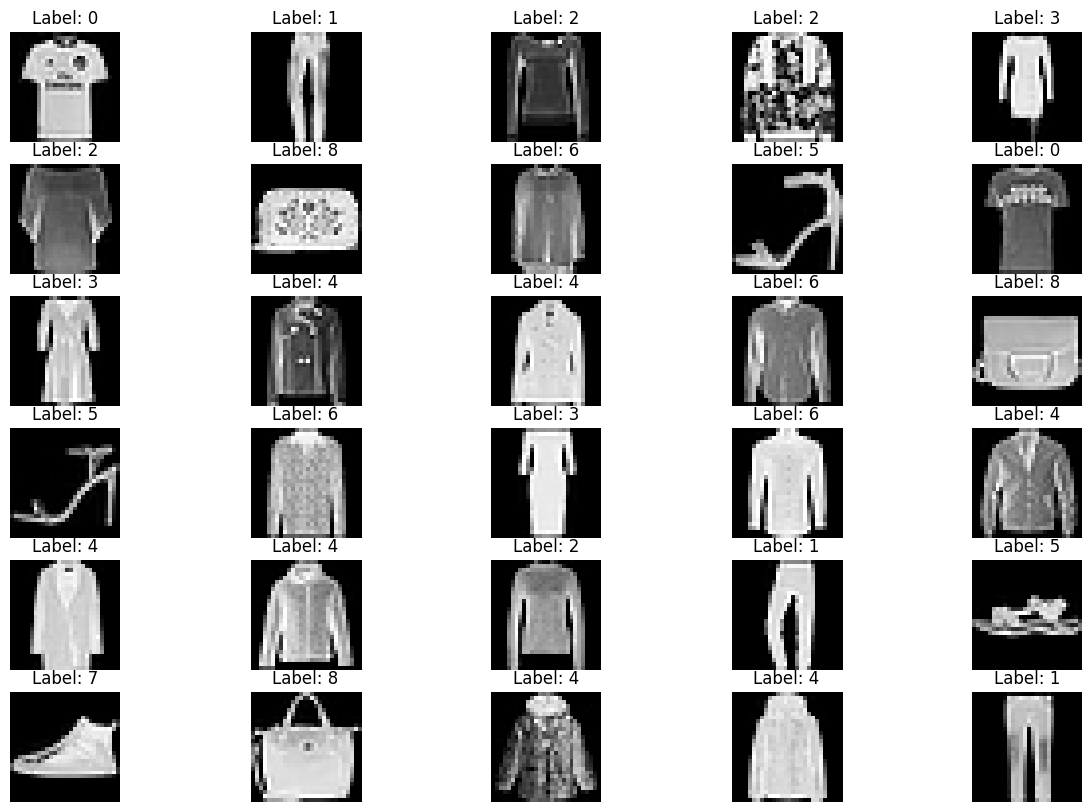

In [ ]:
#Visualizamos las imagenes
plt.figure(figsize=(15, 10))  #Tamaño de imagen
for i in range(30): #Cantidad de imagenes a mostrar
    plt.subplot(6, 5, i+1)  #Distribución de las imagenes
    plt.imshow(images[i], cmap='gray')  #Mostrarlas en escala de grises
    plt.title(f'Label: {y[i]}') #Muestra la clase a la que pertenece cada imagen
    plt.axis('off') #Quitamos las lineas
plt.show()  #Finalmente se muestran las imaganes

In [ ]:
#Estandarizamos los datos
scaler = StandardScaler() #Definimos la funcion scaler
X_scaled = scaler.fit_transform(X)  #Aplicamos la funcion definida anteriormente a X

In [ ]:
X_scaled  #Mostramos como quedan los datos escalados

array([[-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051],
       ...,
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
         0.0496505 , -0.03392051],
       [-0.01633211,  1.88456549,  1.18190658, ..., -0.15481944,
        -0.08435895, -0.03392051],
       [-0.01633211, -0.01961304, -0.02088854, ..., -0.15481944,
        -0.08435895, -0.03392051]])

In [ ]:
#Ralizamos el pca a 95% como se pide
pca = PCA(n_components=0.95) #Definimos la función PCA tal que la cantidad de variables mantenga el 95% de la varianza

X_pca = pca.fit_transform(X_scaled) #Aplicamos la función antes definida a X(pixeles)

In [ ]:
print(f"Cantidad de componentes usados: {pca.n_components_}") #Nos dice cuantas componentes se usaron en el pca dada la restricción de 95%

Cantidad de componentes usados: 243


In [ ]:
X_pca #Visualizamos como queda el dataset

array([[ 15.89695975,  -4.20823984,   0.67582921, ...,  -0.30502477,
          0.14387972,  -0.6011096 ],
       [ -1.14655528, -17.44520114,   5.47488367, ...,  -1.03502094,
          0.71201876,   0.34409367],
       [ -9.79242003,  -3.20734022, -12.46553155, ...,  -0.16077567,
          0.11776304,  -0.16752093],
       ...,
       [  4.29646676,  10.41309483,  -4.42499383, ...,   0.46590753,
          0.3521025 ,  -0.28957779],
       [ 19.5213348 ,  18.29732455,  -2.26791863, ...,   0.16335793,
         -0.63930318,  -0.71961928],
       [ 22.45732003,  -0.85621212,  -4.41673327, ...,  -0.83887726,
          1.12383964,   0.61954714]])

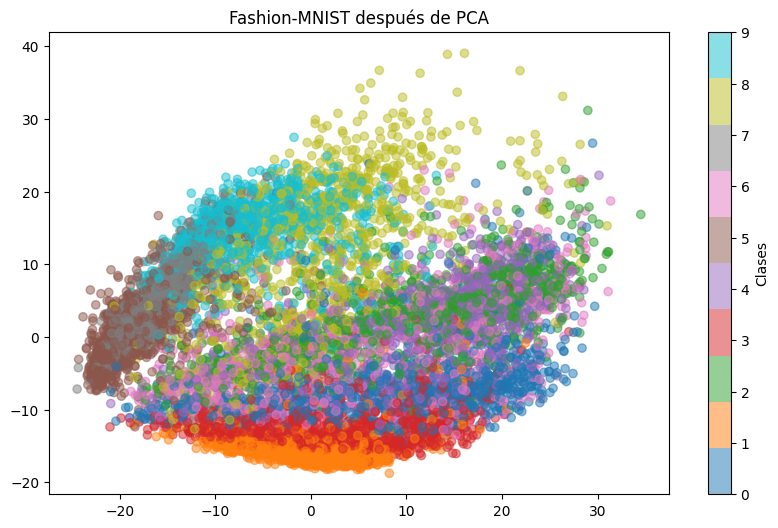

In [ ]:
#Graficamos los datos después del pca con respecto a su clase
plt.figure(figsize=(10, 6)) #Tamaño del gráfico
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5) #Definimos los ejes
plt.colorbar(label='Clases')  #Separamos las clases por color
plt.title('Fashion-MNIST después de PCA') #Título del gráfico
plt.show()  #Se muestra el gráfico

Podemos observar que las clases están muy solapadas, lo que se predice es que será muy difícil separar las clases.

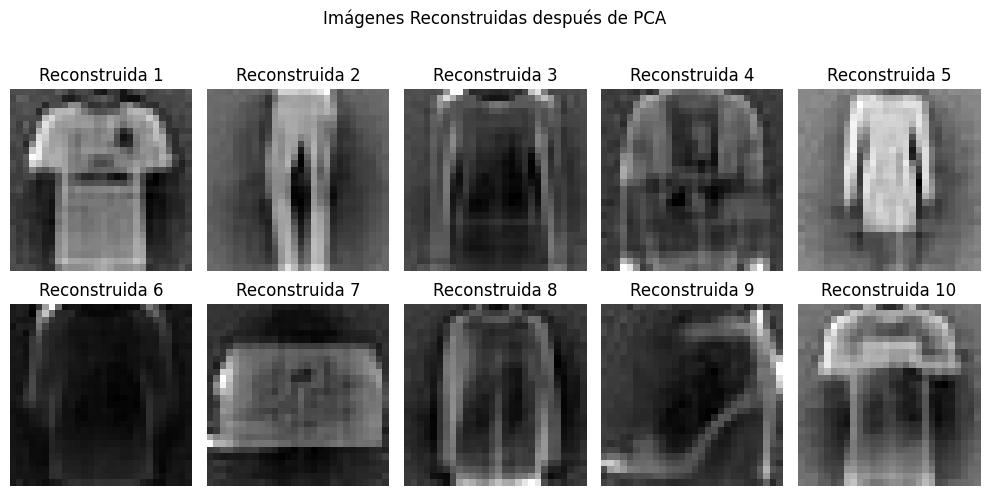

In [ ]:
#Vemos las imagenes después de realizar el PCA
X_pca_primeras_10 = X_pca[:10]  #Toma las primeras 10 filas

imagenes_reconstruidas = pca.inverse_transform(X_pca_primeras_10) #Definimos la inversa del PCA para obtener los pixeles

imagenes = imagenes_reconstruidas.reshape(10, 28, 28) #Armamos la imagen con lo pixeles antes obtenidos

# Visualizar las imágenes reconstruidas
plt.figure(figsize=(10, 5)) #Tamaño del gráfico
for i in range(10): #Cantidad de imagenes
    plt.subplot(2, 5, i+1)  #Distribución de imagenes
    plt.imshow(imagenes[i], cmap='gray')  #Imaganes en escala de grises
    plt.title(f'Reconstruida {i+1}')  #Nombre de cada imagen
    plt.axis('off') #Quitamos los ejes
plt.suptitle('Imágenes Reconstruidas después de PCA', y=1.02) #Título
plt.tight_layout() # Evitar superposición
plt.show()  #Muestra el gráfico

### Dataset 2: *mchrishtw/human-activity-recognition-with-smartphones*

In [ ]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Descargamos el dataset
path2 = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path2)

100%|██████████| 24.5M/24.5M [00:00<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2


In [ ]:
df_train2 = pd.read_csv(path2 + '/train.csv')
df_test2 = pd.read_csv(path2 + '/test.csv')
# Concatenar los dataframes de entrenamiento, prueba y uno confirmado
df_total2 = pd.concat([df_train2, df_test2], ignore_index=True)

In [ ]:
df_test2.count()
df_train2.count()
df_total2.count()

,0
tBodyAcc-mean()-X,10299
tBodyAcc-mean()-Y,10299
tBodyAcc-mean()-Z,10299
tBodyAcc-std()-X,10299
tBodyAcc-std()-Y,10299
...,...
"angle(X,gravityMean)",10299
"angle(Y,gravityMean)",10299
"angle(Z,gravityMean)",10299
subject,10299


In [ ]:
df_train2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df_test2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
# Revisar columnas
print(df_train2.columns[-5:])
print("Shape train:", df_train2.shape, "| Shape test:", df_test2.shape)


Index(['angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)',
       'subject', 'Activity'],
      dtype='object')
Shape train: (7352, 563) | Shape test: (2947, 563)


In [ ]:
# Preprocesamiento
X_train = df_train2.drop(columns=["subject", "Activity"])
y_train = df_train2["Activity"]

X_test = df_test2.drop(columns=["subject", "Activity"])
y_test = df_test2["Activity"]

# Estandarizamos las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# PCA (mantener 90% varianza)
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA - componentes seleccionados: {X_train_pca.shape[1]}")


PCA - componentes seleccionados: 63


In [ ]:
# ICA (10 componentes)
ica = FastICA(n_components=10, random_state=42)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)


In [ ]:
# Clasificación con Random Forest
model_pca = RandomForestClassifier(random_state=0)
model_ica = RandomForestClassifier(random_state=0)

model_pca.fit(X_train_pca, y_train)
model_ica.fit(X_train_ica, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
y_pred_ica = model_ica.predict(X_test_ica)

acc_pca = accuracy_score(y_test, y_pred_pca)
acc_ica = accuracy_score(y_test, y_pred_ica)

print("Accuracy PCA:", acc_pca)
print("Accuracy ICA:", acc_ica)


Accuracy PCA: 0.8747879199185612
Accuracy ICA: 0.825585341024771



PCA - Classification Report
                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       537
           SITTING       0.84      0.75      0.79       491
          STANDING       0.79      0.91      0.85       532
           WALKING       0.84      0.96      0.89       496
WALKING_DOWNSTAIRS       0.90      0.75      0.82       420
  WALKING_UPSTAIRS       0.90      0.91      0.91       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947


ICA - Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      0.93      0.96       537
           SITTING       0.70      0.59      0.64       491
          STANDING       0.69      0.84      0.76       532
           WALKING       0.86      0.96      0.91       496
WALKING_DOWNSTAIRS       0.92      0.7

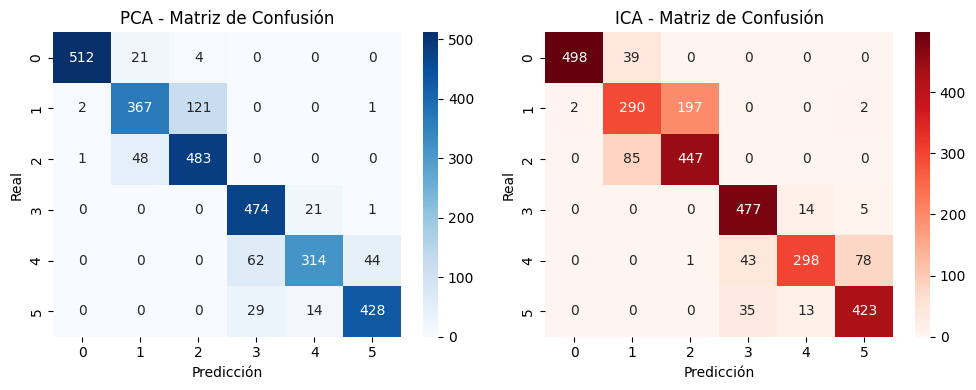

In [ ]:
# Reportes y matrices de confusión

print("\nPCA - Classification Report")
print(classification_report(y_test, y_pred_pca))

print("\nICA - Classification Report")
print(classification_report(y_test, y_pred_ica))

# Matriz de confusión PCA
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Blues')
plt.title("PCA - Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")

# Matriz de confusión ICA
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_ica), annot=True, fmt='d', cmap='Reds')
plt.title("ICA - Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.tight_layout()
plt.show()


### Dataset 3: *wine-quality*

In [ ]:
# Download latest version
path3 = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path3)

Path to dataset files: /kaggle/input/wine-quality


In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv(path3 + "/winequalityN.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Notamos que existen bastantes valores nulos en las columnas, es decir, no poseen la misma cantidad de valor no nulos. Ante esto, eliminaremos simplemente las filas con valores nulos:

In [ ]:
df3.dropna(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


De esta manera, ahora podemos trabajar.

Entonces, nosotros queremos predecir la variable "quality", para ello, seguiremos la siguiente estructura:

1.   Diferenciaremos entre variables numéricas y categóricas.
2.   Haremos un train-test-split, para luego trabajar al modelo
3.   Generaremos un Pipeline, con el preprocesado (Escalamamiento y codificación de variables categóricas) en las variables del paso (1)
4.   Graficaremos los resultados en un scatter plot.







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
num3 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cat3 = ['type']

Definimos ahora nuestros conjuntos de datos a trabajar con el modelo:

In [ ]:
X3 = df3[num3 + cat3]
y3 = df3['quality']

Hacemos el train-test-split:

In [ ]:
X3_tr, X3_te, y3_tr, y3_te = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
prep3 = ColumnTransformer([
    ('num3', StandardScaler(), num3),
    ('cat3', OneHotEncoder(drop='first'), cat3)
])

Ahora, importamos la librería Pipeline, para poder generarlo:

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
lda3 = Pipeline([
    ("prep3", prep3),
    ("lda", LinearDiscriminantAnalysis(n_components=2) )
])

Ahora, entrenamos nuestro modelos con nuestros datos de entrenamiento:

In [ ]:
lda3.fit(X3_tr, y3_tr)

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('num3', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('cat3',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('lda', LinearDiscriminantAnalysis(n_components=2))])

Y observamos la predicción que nos entrega:

In [ ]:
pred3 = lda3.predict(X3_te)
pred3

array([6, 5, 6, ..., 6, 5, 5])

Comparémosla con las variables originales, para ver qué tan fidedigno/bueno es nuestro modelo. Para ello, importamos dos métricas:

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [ ]:
print("RMSE:", rmse(y3_te, pred3))
print("r2_score:", r2_score(y3_te, pred3))

RMSE: 0.7691861489825093
r2_score: 0.25332331871400215


Sin embargo, obtenemos un valor de R^2 bastante bajo. Analicemos la precisión de otro modo, pues, la precisión del modelo no es única, y dependerá del tipo de datos y sus distribuciones.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
accuracy = accuracy_score(y3_te, pred3)
precision = precision_score(y3_te, pred3, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.54
Precision: 0.52


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Así, obtenemos valores más prometedores en base a nuestro desarrollo.

Ahora, grafiquemos:

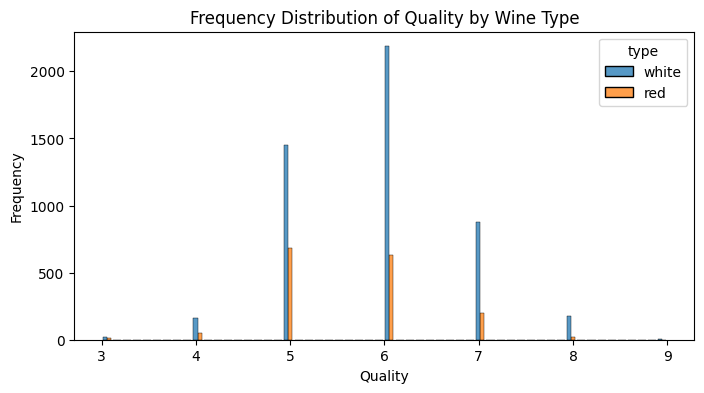

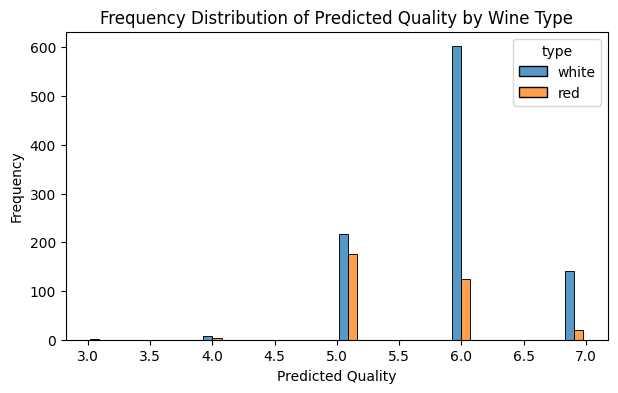

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'type' vs 'quality' with frequency representation
plt.figure(figsize=(8, 4))
sns.histplot(data=df3, x='quality', hue='type', multiple='dodge', shrink=0.8)
plt.title('Frequency Distribution of Quality by Wine Type')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Create a new DataFrame for the test set and predictions
results_df = X3_te.copy()
results_df['quality'] = y3_te
results_df['predicted_quality'] = pred3

# Create a scatter plot of 'type' vs 'predicted_quality' with frequency representation
plt.figure(figsize=(7, 4))
sns.histplot(data=results_df, x='predicted_quality', hue='type', multiple='dodge', shrink=0.8)
plt.title('Frequency Distribution of Predicted Quality by Wine Type')
plt.xlabel('Predicted Quality')
plt.ylabel('Frequency')
plt.show()

De este modo, notamos varias cosas:


1.   La predicción distribuye el vino blanco y tinto en calidades medias-altas.
2.   Gráficamente, la distribución de la predicción es un poco más homogénea (es decir, en frecuencias); al menos para las calidades 5 y 7.
3.   Calidades bajas, díganse con valores <= 4 y calidades altas, con valores >= 8, no aparencen con demasiada frecuencia en nuestra predicción.

De esto, comparando ambos gráficos, podemos entender nuestra predicción como existosa, pues la distribución de los vinos (originalmente), si bien también predomina el vino blanco, se distribuía en mayor cantidad entre valores 5 y 7. De modo que era de esperar, que en virtud de ello, las predicciones tomasen valores cerca de esos intervalos.



### Dataset 4: *credit-card-fraud*

In [ ]:
import pandas as pd #Importamos pandas para leer data set
import kagglehub  #Importamos Kaggle para descargar el data set

path4 = kagglehub.dataset_download("mlg-ulb/creditcardfraud") #Definimos donde se descarga

print(path4)  #Visualizamos donde se descarga

/kaggle/input/creditcardfraud


In [ ]:
df4 = pd.read_csv(path4 + "/creditcard.csv")  #Definimos el data set
df4.head()  #Vemos el data set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np  #Importamos numpy para calculos
from sklearn.preprocessing import StandardScaler  #Importamos Sckit learn para standar scaler
from sklearn.manifold import TSNE #Importamos Scikit learn para TSNE
import matplotlib.pyplot as plt #importamos matplot para graficar

In [ ]:
#Separamos los datos
X = df4.drop(columns=["Class","Time"])  #Eliminamos columnas
y = df4["Class"]  #Separamos la clase

In [ ]:
#Normalizamos los datos
scaler = StandardScaler() #Definimos starndar scaler
X_scaled = scaler.fit_transform(X)  #Aplicamos la función a X

In [ ]:
from time import time #Importamos time para medir el tiempo

#### TSNE

In [ ]:
#Definimos TSNE con parámetros para optimizar
tsne_params = {
    'n_components': 2,  #Cantidad de componentes, 2 para graficar
    'perplexity': 30,  #Priorizamos velocidad
    'n_iter': 1000,    #Número de iteraciones para converger
    'early_exaggeration': 12,  #Acelera el proceso
    'n_iter_without_progress': 150,  #Maximo de iteraciones por paso
    'method': 'barnes_hut', #Acelera los calculos
    'angle': 0.8,      #Priorizamos velocidad ante precisión
    'init': 'pca'      #Aceleramos proceso
}

OBS: Esta línea demota 60 minutos usando GPU

In [ ]:
#Realizamos TSNE
start_time = time() #Medimos tiempo
tsne = TSNE(**tsne_params)  #Definimos TSNE
X_tsne = tsne.fit_transform(X_scaled)  #APlicamos TSNE

print(f"Tiempo de ejecución: {(time()-start_time)/60:.2f} minutos") #Mostramos cuanto se demora

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Tiempo de ejecución: 60.72 minutos


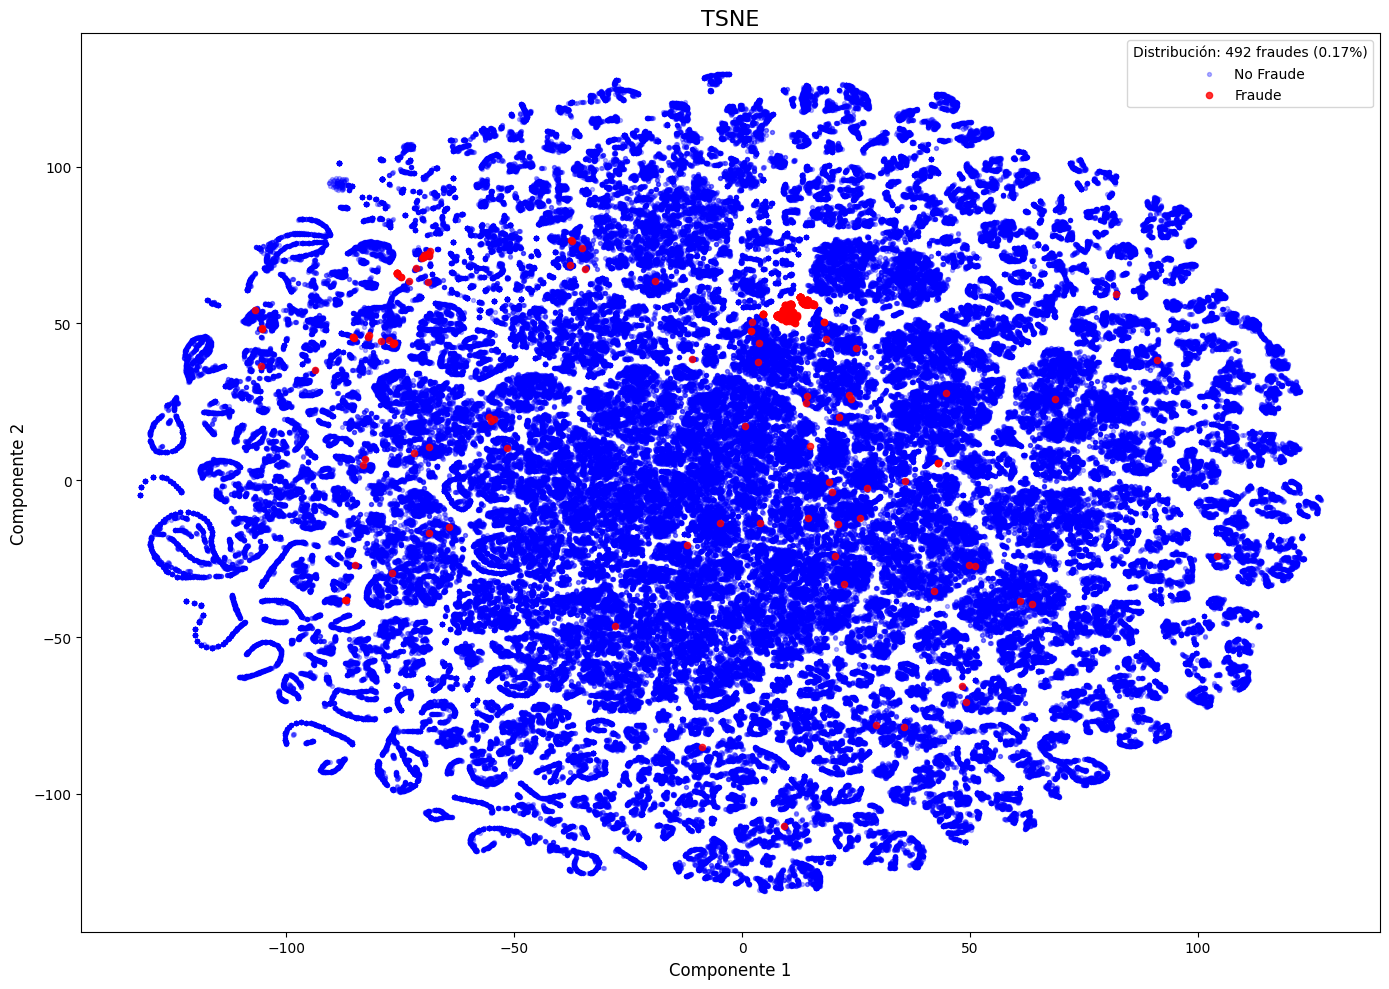

In [ ]:
#Visualizamos los datos
plt.figure(figsize=(14, 10))  #Tamaño de la figura
#Ajustamos tonos de los puntos
alpha_values = {0: 0.3, 1: 0.8}  #Damos distintos valores de transparencia a fraude y no fraude
size_values = {0: 8, 1: 20}       #Damos distintos tamaños a los puntos de fraude y no fraude

for class_value in np.unique(y):  #Definimos para graficar
    mask = (y == class_value) #Separamos por clase
    plt.scatter(
        X_tsne[mask, 0], X_tsne[mask, 1], #Separamos la clase
        c='red' if class_value == 1 else 'blue',  #Damos colores a las clases
        label='Fraude' if class_value == 1 else 'No Fraude',  #Damos nombre a las clases
        alpha=alpha_values[class_value],
        s=size_values[class_value],
    )

plt.title('TSNE', fontsize=16)  #Titulo
plt.xlabel('Componente 1', fontsize=12) #Eje X
plt.ylabel('Componente 2', fontsize=12) #Eje Y

#Tabla
fraud_count = sum(y == 1) #Cantidad de fraudes
total_count = len(y)  #Cantidad de datos
plt.legend(
    title=f"Distribución: {fraud_count} fraudes ({fraud_count/total_count:.2%})", #Distribución de fraudes
    loc='best',
    frameon=True,
    framealpha=0.8
)
plt.tight_layout()
plt.show()  #Grafica

Observamos una pequeña mancha roja, por lo que se espera que esos fraudes sean los mejores en predicción, ya que hay algunos que están mezclados entre la masa azul, los cuales serán casi imposibles de predecir.

#### UMAP

In [ ]:
#Defnimos para realizar UMAP
from umap import UMAP #Importamos umap
import warnings #Importamos alerta
warnings.filterwarnings('ignore', category=UserWarning)  #Ignora alertas de UMAP

In [ ]:
#Definimos UMPA optimizado
umap_params = {
    'n_components': 2,  #Definimos 2 dimensiones
    'n_neighbors': 15,  #Vecindad de 15, más local
    'min_dist': 0.1,  #Definimos la distancia minima entre puntos
    'metric': 'euclidean',  #Definimos emtrica euclideana
    'random_state': 42, #Fijamos la semilla
    'n_epochs': 200,  #Fijamos máximo de iteraciones para converger
    'low_memory': True, #Optimizamos memoria
    'unique': True, #Quitamos datos duplicados
    'densmap': False, #Optimiza velocidad
    'dens_lambda': 0.0, #Reduce los calculos
    'output_dens': False  #Disminuye cantidad de calculos
}

OBS: Esta línea demora 10 minutos con GPU

In [ ]:
start_time = time() #Comenzamos a medir el tiempo
umap = UMAP(**umap_params)  #Definimos UMAP optimizado
X_umap = umap.fit_transform(X_scaled) #Aplicamos UMAP
print(f"Tiempo: {(time()-start_time)/60:.2f} minutos")  #Mostramos el tiempo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tiempo: 10.26 minutos


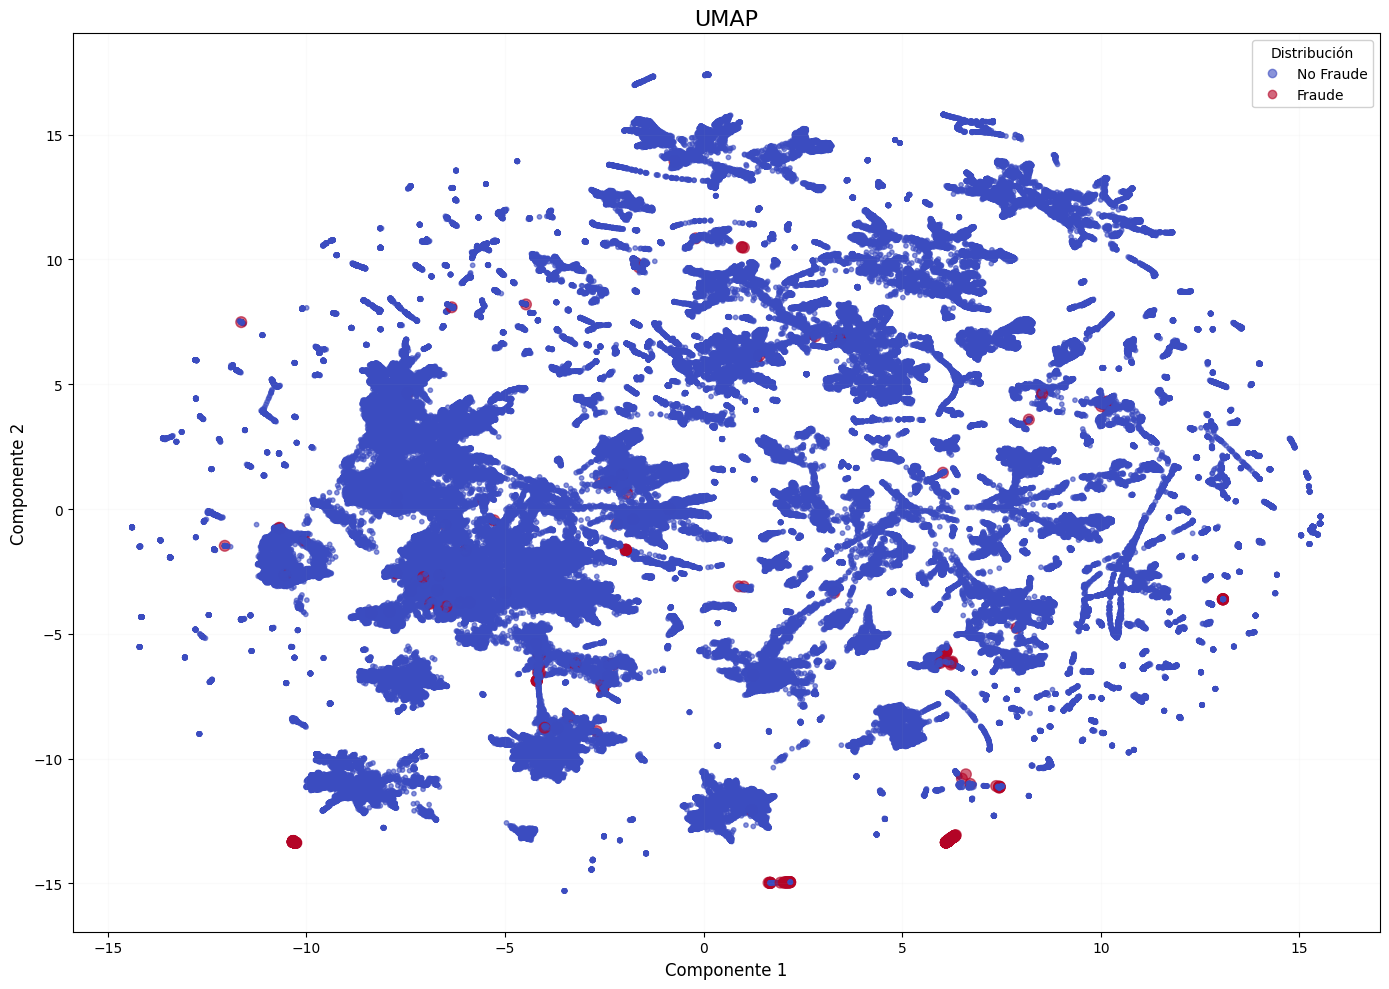

In [ ]:
#Graficamos UMAP
plt.figure(figsize=(14, 10))  #Tamaño del gráfico
scatter = plt.scatter(
    X_umap[:, 0], X_umap[:, 1], #Definimos las variables
    c=y,  #Definimos colores para distintas clases
    cmap='coolwarm',  #Damos los colores
    alpha=0.6,  #Transparencia
    s=10 + 50*(y == 1), #Tamaño de puntos
)
#Leyenda
legend = plt.legend(
    handles=scatter.legend_elements()[0], #Extrae datos
    labels=['No Fraude', 'Fraude'], #Nombres
    title="Distribución", #Titulo
    frameon=True, #Tono del borde
    framealpha=0.9  #Transparencia
)
plt.title('UMAP', fontsize=16)  #Titulo del gráfico
plt.xlabel('Componente 1', fontsize=12) #Eje X
plt.ylabel('Componente 2', fontsize=12) #Eje Y
plt.grid(alpha=0.05)  #Grilla suave
plt.tight_layout()  #Evita solapamiento
plt.show()  #Grafica

El UMAP, se ve bastante confuso en comparación con TSNE, aquí se ven varios puntos mezclados. Hay solo dos manchas rojas que se ven más esperables a predecir.

### Dataset 5: *uci-ml/energy-efficiency*

In [ ]:
import kagglehub

# Download latest version
path5 = kagglehub.dataset_download("ujjwalchowdhury/energy-efficiency-data-set")

print("Path to dataset files:", path5)

Path to dataset files: /kaggle/input/energy-efficiency-data-set


In [ ]:
df5 = pd.read_csv(path5 + '/energy_efficiency_data.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Notamos que no hay variables categóricas. Por lo tanto, no tenemos que realizar una codificación. Sin embargo, como queremos hacer un PCA, **tenemos que escalar nuestras variables**.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Ahora, separamos nuestras variables, pues en este caso, queremos estimar "Heating_Load" y "Cooling_Load", que es -en palabras sencillas- la eficiencia de los edificios, respecto de los demás parámetros.

In [ ]:
X5 = df5.drop(columns=['Heating_Load','Cooling_Load'])
y5 = df5[['Heating_Load','Cooling_Load']]

Y escalamos, construimos nuestro PCA a 2 componentes y evaluamos nuestro modelo:

In [ ]:
X5_scaled = StandardScaler().fit_transform(X5)
pca5 = PCA(n_components=2)
X5_pca = pca5.fit_transform(X5_scaled)

In [ ]:
X5_pca

array([[-3.12895415, -0.90237343],
       [-3.12895415, -0.90237343],
       [-3.12895415, -0.90237343],
       ...,
       [ 2.40682619,  1.28785724],
       [ 2.40682619,  1.28785724],
       [ 2.40682619,  1.28785724]])

In [ ]:
components5 = pca5.components_
components5

array([[-4.95951415e-01,  5.01733022e-01, -3.25142980e-02,
         5.04962227e-01, -4.96237987e-01,  1.69557319e-18,
         1.09289569e-16, -3.27011372e-17],
       [-2.44734692e-01,  2.31540671e-01,  8.94291660e-01,
        -2.06120761e-01,  2.10358046e-01,  3.19211612e-18,
         4.26475608e-16,  3.20590903e-16]])

Finalmente, lo que nos interesa estudiar es la "explained_variance_ratio" del PCA:

In [ ]:
explained_var5 = pca5.explained_variance_ratio_
explained_var5

array([0.46286741, 0.15498141])

Notamos que en este caso, tenemos una varianza explicada máxima de un 46%, lo cual nos señala que, en éste caso en particular, la reducción a 2 componentes por PCA no es una buena alternativa, pues no es representativa.

Se realizó el mismo ejercicio para valores de n_components iguales a 3,4,5 y 6, pero sólo se obtuvieron valores decrecientes de la varianza explicada y que, en ningún momento, superaban el valor máximo de 46%. Ante ello, no se prosiguió con mayores valores.

## Parte 2: Modelos Supervisados sobre Datos Reducidos

### Dataset 1: *zalando-research/fashionmnist*

In [ ]:
#Importamos la librerias necesarias
from sklearn.model_selection import train_test_split  #Libreria para entrenar modelos
from sklearn.linear_model import LogisticRegression #Librería para el modelo de regresión lineal
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Librería para metricas

#### Logistic Regression

##### Para datos reducidos por PCA

In [ ]:
#Definimos las variables para el modelo
X_train, X_test, y_train, y_test = train_test_split(  #Definimos los entrenamiento con sus respectivas clases y los tests
    X_pca, y, #Tomamos las variables depués de PCA
    test_size=0.2,  #Definimos el porcentaje de test 20% test, 80% entrenamiento
    random_state=42,
    stratify=y  #Mantiene la proporción de clases
)

In [ ]:
#Entrenamos el modelo Logistic regression
log_reg = LogisticRegression(multi_class='multinomial', #Definimos el modelo de regrsión lineal
                           solver='lbfgs',  #Optimizamos la memoria
                           max_iter=1000 #Acotamos las iteraciones
                            )
log_reg.fit(X_train, y_train) #Aplicamos el modelo para entrenar

#Predicción y evaluación
y_pred = log_reg.predict(X_test)  #Evaluamos las variables test en el modelo ya entrenado

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Vemos efectividad del modelo
from sklearn.metrics import precision_score, recall_score, f1_score #Importamos metricas

print("Accuracy:", accuracy_score(y_test, y_pred))  #Visualizamos el accuracy
print("Precision:", precision_score(y_test, y_pred, average='macro')) #Visualizamos precisión con macro para comparar clases
print("Recall:", recall_score(y_test, y_pred, average='macro')) #Visualizamos recall score con macro para comparar clases
print("F1-Score:", f1_score(y_test, y_pred, average='macro')) #Visualizamos f1 score con macro para comparar clases


Accuracy: 0.812
Precision: 0.8132382422658055
Recall: 0.812
F1-Score: 0.8123145902957525


In [ ]:
class_names = ['Polera', 'Pantalon', 'Poleron', 'Vestidos', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín'] #Renombramos las clases

In [ ]:
print("Reporte:")
print(classification_report(y_test, y_pred, target_names=class_names))  #Vemos la comparación

Reporte:
              precision    recall  f1-score   support

      Polera       0.73      0.70      0.71       200
    Pantalon       0.95      0.96      0.96       200
     Poleron       0.72      0.66      0.69       200
    Vestidos       0.82      0.80      0.81       200
      Abrigo       0.71      0.74      0.73       200
    Sandalia       0.92      0.92      0.92       200
      Camisa       0.54      0.58      0.56       200
   Zapatilla       0.89      0.91      0.90       200
       Bolso       0.93      0.94      0.93       200
       Botín       0.92      0.92      0.92       200

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



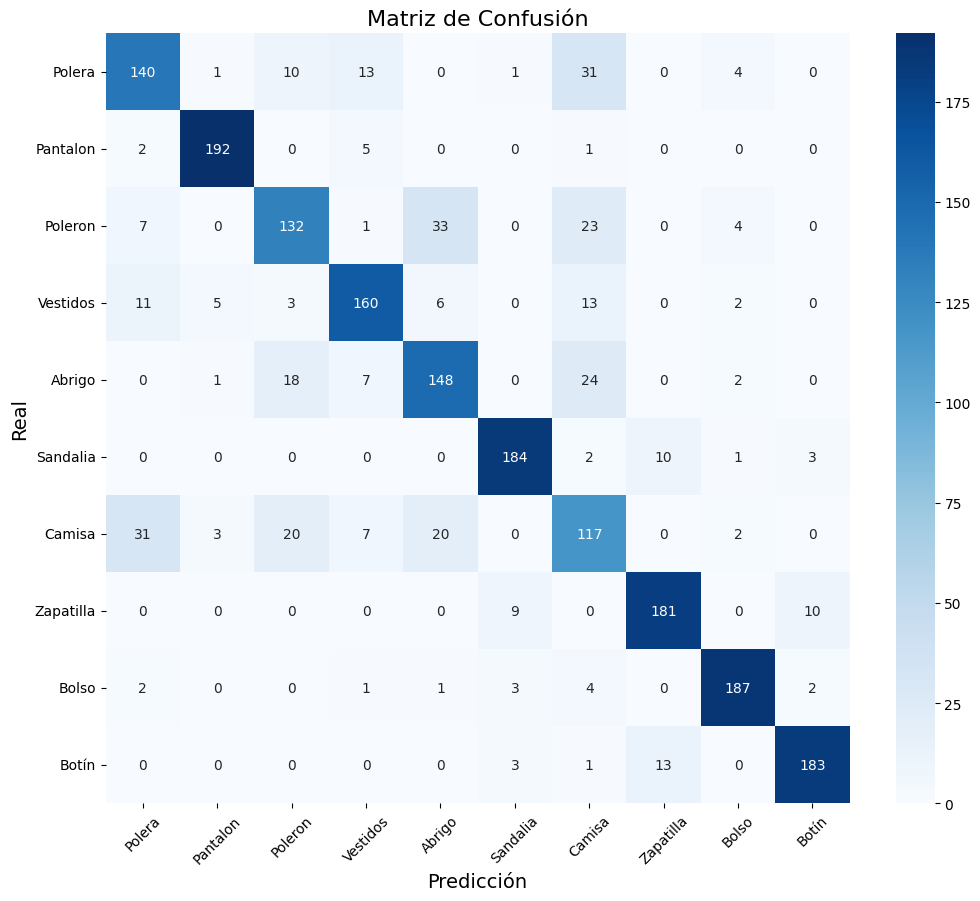

In [ ]:
#Hacemos matriz de confusión
import seaborn as sns #Importamos seaborn para hacer la matriz
from sklearn.metrics import confusion_matrix  #Importamos la matriz como tal

conf_mat = confusion_matrix(y_test, y_pred) #Definimos la matriz
plt.figure(figsize=(12, 10))  #Tamaño de gráfico
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Tono de la matriz
            xticklabels=class_names,  #Filas
            yticklabels=class_names)  #Columnas
plt.title('Matriz de Confusión', fontsize=16) #Título
plt.xlabel('Predicción', fontsize=14) #Eje X: Lo que predice el modelo
plt.ylabel('Real', fontsize=14) #Eje Y: La clase real
plt.xticks(rotation=45) #Rotamos la palabra para que se vea mejor
plt.yticks(rotation=0)
plt.show()  #Mostramos la matriz

In [ ]:
#Vemos la cantidad de fallos
incorrect_indices = np.where(y_pred != y_test)[0] #Definimos la función para ver los errores de predicción
print(f"Fallos: {len(incorrect_indices)}/{len(y_test)} ({len(incorrect_indices)/len(y_test):.2%})")
#Mostramos los Fallos en cantidad y porcentaje

Fallos: 376/2000 (18.80%)


##### Para datos sin reducir

In [ ]:
#Definimos las variables para el modelo
X_train2, X_test2, y_train2, y_test2 = train_test_split(  #Definimos los entrenamiento con sus respectivas clases y los tests
    X, y, #Tomamos las variables originales
    test_size=0.2,  #Definimos el porcentaje de test 20% test, 80% entrenamiento
    random_state=42,
    stratify=y  #Mantiene la proporción de clases
)

In [ ]:
#Entrenamos el modelo Logistic regression
log_reg = LogisticRegression(multi_class='multinomial', #Definimos el modelo de regrsión lineal
                           solver='lbfgs',  #Optimizamos la memoria
                           max_iter=1000 #Acotamos las iteraciones
                            )
log_reg.fit(X_train2, y_train2) #Aplicamos el modelo para entrenar

#Predicción y evaluación
y_pred2 = log_reg.predict(X_test2)  #Evaluamos las variables test en el modelo ya entrenado

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Vemos efectividad del modelo sin PCA
print("Accuracy:", accuracy_score(y_test2, y_pred2))  #Visualizamos el accuracy
print("Precision:", precision_score(y_test2, y_pred2, average='macro')) #Visualizamos precisión con macro para comparar clases
print("Recall:", recall_score(y_test2, y_pred2, average='macro')) #Visualizamos recall score con macro para comparar clases
print("F1-Score:", f1_score(y_test2, y_pred2, average='macro')) #Visualizamos f1 score con macro para comparar clases

Accuracy: 0.754
Precision: 0.7593900890109287
Recall: 0.7540000000000001
F1-Score: 0.755581731716418


In [ ]:
print("Reporte sin PCA:")
print(classification_report(y_test2, y_pred2, target_names=class_names))  #Vemos la comparación

Reporte sin PCA:
              precision    recall  f1-score   support

      Polera       0.68      0.66      0.67       200
    Pantalon       0.94      0.95      0.95       200
     Poleron       0.57      0.62      0.60       200
    Vestidos       0.84      0.72      0.78       200
      Abrigo       0.65      0.60      0.62       200
    Sandalia       0.88      0.81      0.85       200
      Camisa       0.48      0.54      0.51       200
   Zapatilla       0.82      0.89      0.85       200
       Bolso       0.88      0.88      0.88       200
       Botín       0.85      0.86      0.86       200

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.76      0.75      0.76      2000



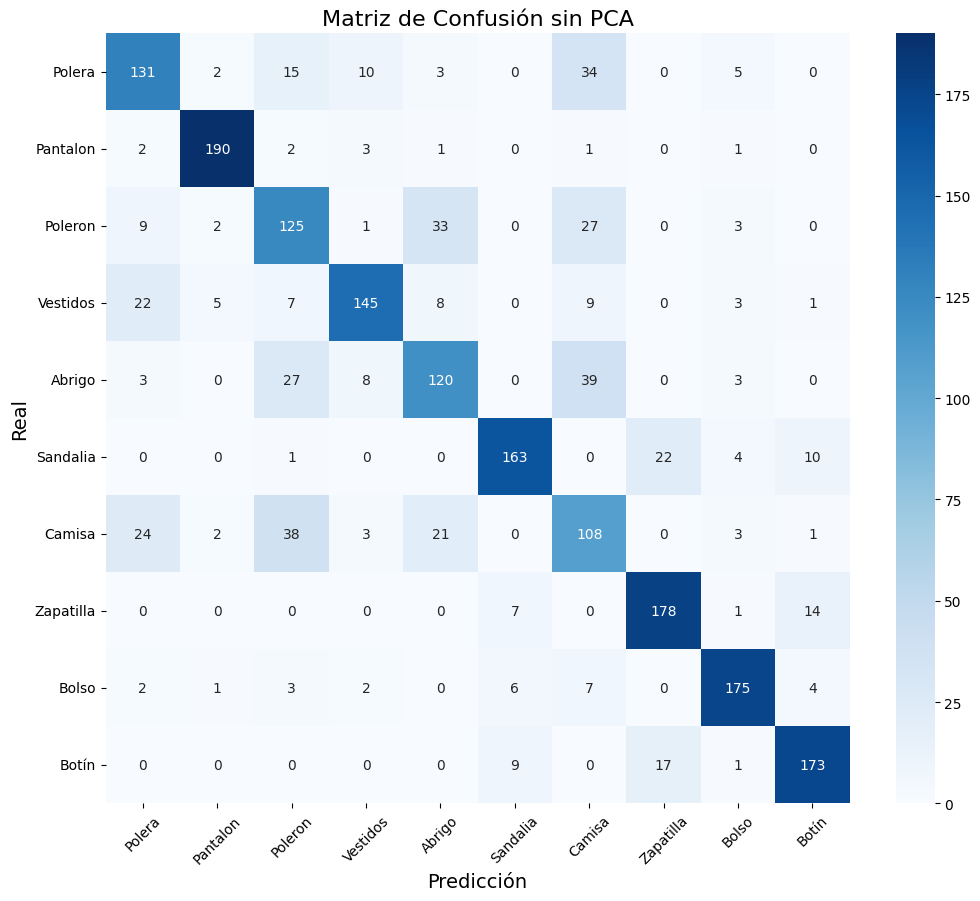

In [ ]:
#Hacemos matriz de confusión sin PCA
conf_mat = confusion_matrix(y_test2, y_pred2) #Definimos la matriz
plt.figure(figsize=(12, 10))  #Tamaño de gráfico
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Tono de la matriz
            xticklabels=class_names,  #Filas
            yticklabels=class_names)  #Columnas
plt.title('Matriz de Confusión sin PCA', fontsize=16) #Título
plt.xlabel('Predicción', fontsize=14) #Eje X: Lo que predice el modelo
plt.ylabel('Real', fontsize=14) #Eje Y: La clase real
plt.xticks(rotation=45) #Rotamos la palabra para que se vea mejor
plt.yticks(rotation=0)
plt.show()  #Mostramos la matriz

In [ ]:
#Vemos la cantidad de fallos
incorrect_indices = np.where(y_pred2 != y_test2)[0] #Definimos la función para ver los errores de predicción
print(f"Fallos: {len(incorrect_indices)}/{len(y_test2)} ({len(incorrect_indices)/len(y_test2):.2%})")
#Mostramos los Fallos en cantidad y porcentaje

Fallos: 492/2000 (24.60%)


###### Comparación

En este caso realizar el PCA ayuda a predecir de manera más exacta, que es no intuitivo ya que se espera que si tenemos los datos completos, el modelo debiese trabajar mejor; en este caso no es así. Hay más fallos en el modelo sin PCA que en el modelo con PCA.

Además en la matriz de confusión se ve lo esperado, que las camisas, poleras y polerones son las prendas que más se confunden. Por otro lado los bolsos tienen la mejor predicción, esto dado que las prendas restantes en si no se parecen a los bolsos.

#### SVM

##### SVM con PCA

In [ ]:
#Implementamos modelo SVM
from sklearn.svm import SVC #Importamos el modelo SVM
#Definimos modelo
svm_model = SVC(kernel='rbf', #Kernel para imagenes
                C=1.0,  #Parámetro de penalización (Por defecto es 1)
                gamma='scale',  #Scale se basa en la varianza
                random_state=42,  #Definimos la semilla
                verbose=True) #Imprime progreso

svm_model.fit(X_train, y_train) #Entrenamos el modelo

[LibSVM]

SVC(random_state=42, verbose=True)

In [ ]:
y_pred_svm = svm_model.predict(X_test)  #Aplicamos el modelo al test

In [ ]:
print("Reporte SVM:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))  #Mostramos resultados

Reporte SVM:
              precision    recall  f1-score   support

      Polera       0.78      0.81      0.79       200
    Pantalon       0.99      0.94      0.97       200
     Poleron       0.77      0.72      0.75       200
    Vestidos       0.87      0.90      0.88       200
      Abrigo       0.77      0.81      0.79       200
    Sandalia       0.93      0.93      0.93       200
      Camisa       0.65      0.62      0.64       200
   Zapatilla       0.89      0.91      0.90       200
       Bolso       0.93      0.98      0.95       200
       Botín       0.94      0.93      0.93       200

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



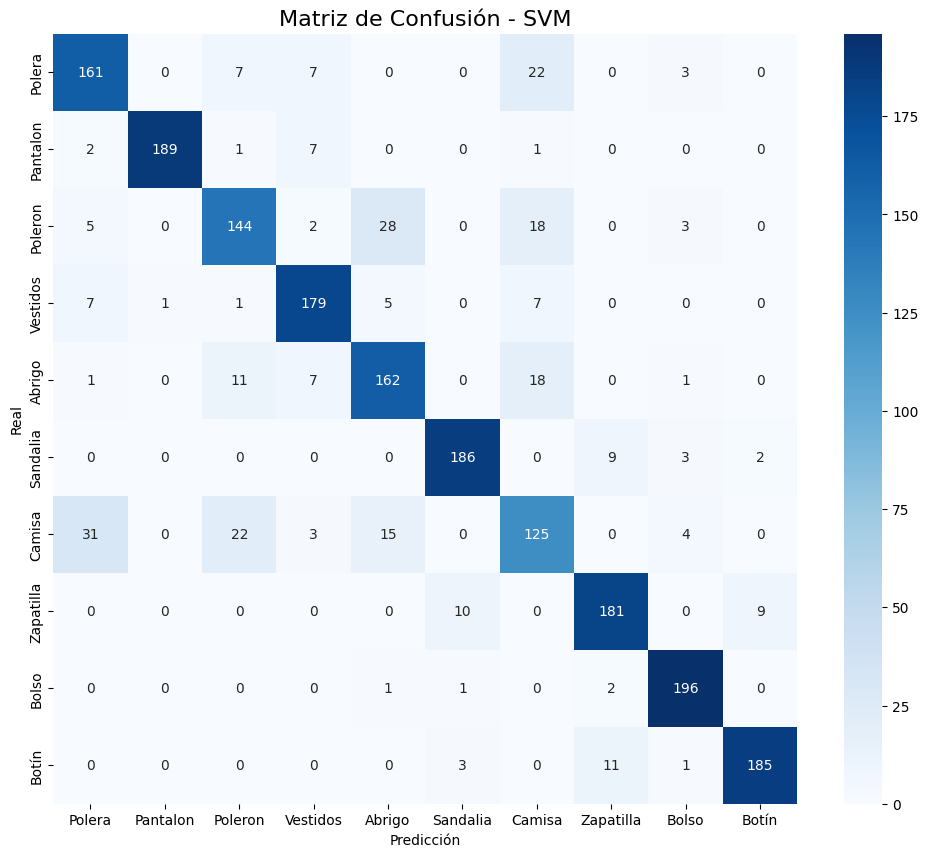

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_svm) #Definimos la matriz de confusión
plt.figure(figsize=(12, 10))  #Tamaño de la figura
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Definimos la figura
            xticklabels=class_names,  #Eje X
            yticklabels=class_names)  #Eje Y
plt.title('Matriz de Confusión - SVM', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Graficamos

In [ ]:
incorrect_indices = np.where(y_pred_svm != y_test)[0] #Definimos los errores
print(f"Fallos: {len(incorrect_indices)}/{len(y_test)} ({len(incorrect_indices)/len(y_test):.2%})")
#Mostramos los fallos en cantidad y porcentaje

Fallos: 292/2000 (14.60%)


##### SVM sin PCA

In [ ]:
svm_model.fit(X_train2, y_train2) #Entrenamos el modelo

[LibSVM]

SVC(random_state=42, verbose=True)

In [ ]:
y_pred_svm2 = svm_model.predict(X_test2)  #Aplicamos el modelo al test

In [ ]:
print("Reporte SVM sin PCA:")
print(classification_report(y_test2, y_pred_svm2, target_names=class_names))  #Mostramos resultados

Reporte SVM sin PCA:
              precision    recall  f1-score   support

      Polera       0.76      0.81      0.78       200
    Pantalon       0.99      0.93      0.96       200
     Poleron       0.74      0.72      0.73       200
    Vestidos       0.88      0.90      0.89       200
      Abrigo       0.77      0.81      0.79       200
    Sandalia       0.91      0.93      0.92       200
      Camisa       0.64      0.61      0.63       200
   Zapatilla       0.90      0.90      0.90       200
       Bolso       0.97      0.96      0.97       200
       Botín       0.93      0.93      0.93       200

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



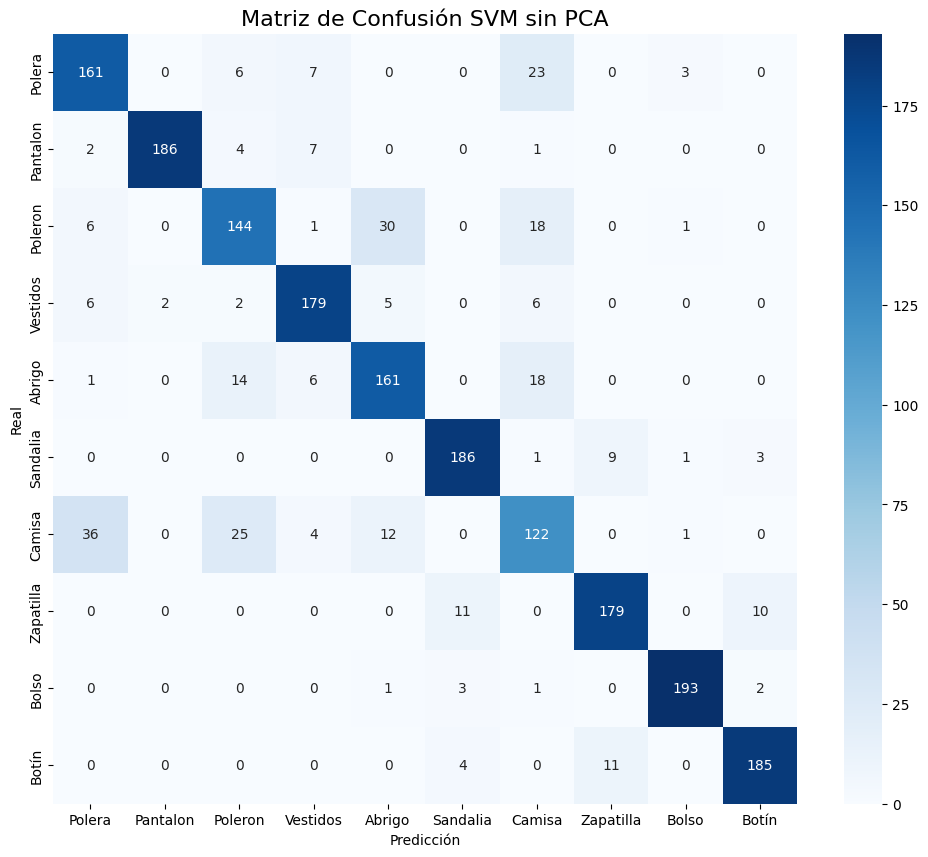

In [ ]:
#Matriz de confusión SVM sin PCA
conf_mat = confusion_matrix(y_test2, y_pred_svm2) #Definimos la matriz de confusión
plt.figure(figsize=(12, 10))  #Tamaño de la figura
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Definimos la figura
            xticklabels=class_names,  #Eje X
            yticklabels=class_names)  #Eje Y
plt.title('Matriz de Confusión SVM sin PCA', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Graficamos

In [ ]:
incorrect_indices = np.where(y_pred_svm2 != y_test2)[0] #Definimos los errores
print(f"Fallos: {len(incorrect_indices)}/{len(y_test2)} ({len(incorrect_indices)/len(y_test2):.2%})")
#Mostramos los fallos en cantidad y porcentaje

Fallos: 304/2000 (15.20%)


###### Comparación

Aquí a diferencia del caso anterior no hay gran diferencia entre las predicciones con o sin PCA, por lo que podemos concluir que si se usa el modelo SVM no tiene un gran impacto reducir o no los datos, aunque si se quiere mejorar si se recomienda usar PCA.

#### KNN

##### KNN con PCA

In [ ]:
#Aplicamos modelo KNN
from sklearn.neighbors import KNeighborsClassifier  #Importamos el modelo KNN

# 1. Definir y entrenar el modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=5,  #Cantidad de vecinos
                                 weights='uniform',  #Asignación de pesos
                                 algorithm='auto',   #Algoritmo automatico
                                 metric='minkowski', #Metrica usada
                                 p=2)               #Euclidiana

knn_model.fit(X_train, y_train) #Entrenamos el modelo

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)  #Aplicamos el modelo

In [ ]:
print("Reporte KNN:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))  #Mostramos resultados

Reporte KNN:
              precision    recall  f1-score   support

      Polera       0.70      0.81      0.75       200
    Pantalon       0.99      0.94      0.96       200
     Poleron       0.72      0.72      0.72       200
    Vestidos       0.88      0.82      0.85       200
      Abrigo       0.71      0.76      0.73       200
    Sandalia       0.98      0.85      0.91       200
      Camisa       0.64      0.59      0.62       200
   Zapatilla       0.87      0.93      0.90       200
       Bolso       0.97      0.95      0.96       200
       Botín       0.90      0.96      0.93       200

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000



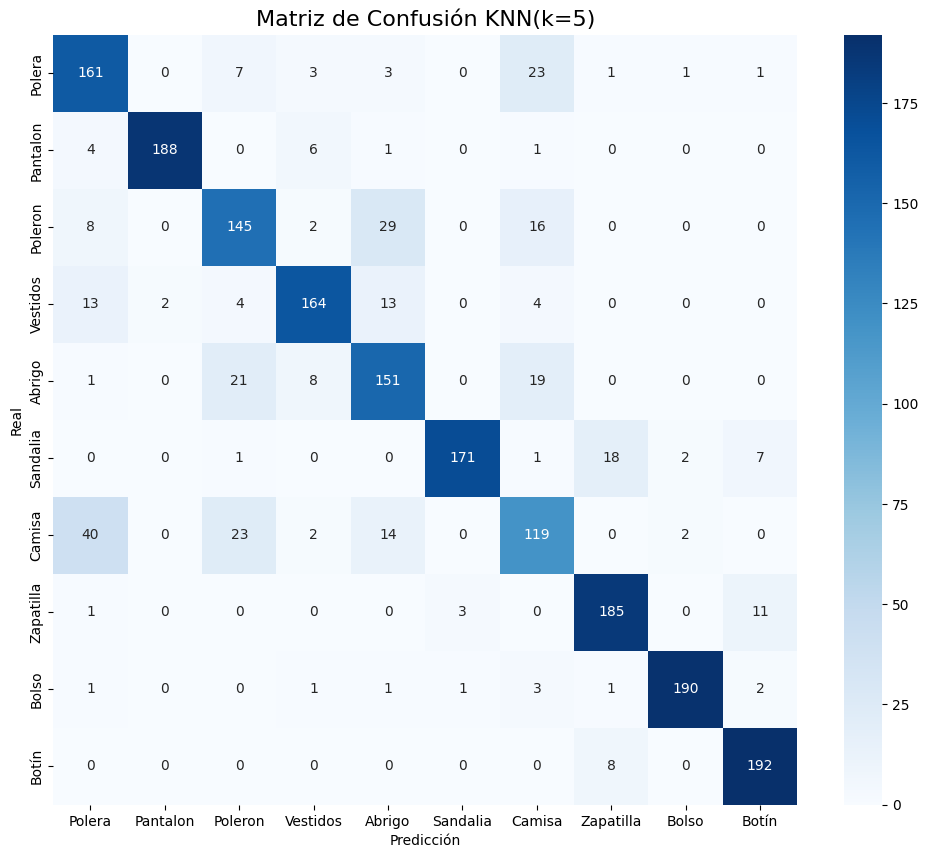

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_knn) #Definimos la matriz de confusión
plt.figure(figsize=(12, 10))  #Tamaño de Matriz
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Definimos la matriz
            xticklabels=class_names,  #Eje X
            yticklabels=class_names)  #Eje Y
plt.title('Matriz de Confusión KNN(k=5)', fontsize=16)  #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Mostramos la matriz

In [ ]:
incorrect_indices = np.where(y_pred_knn != y_test)[0] #Determinamos la cantidad de fallos
print(f"Fallos: {len(incorrect_indices)}/{len(y_test)} ({len(incorrect_indices)/len(y_test):.2%})")
#Mostramos los fallos en cantidad y porcentaje

Fallos: 334/2000 (16.70%)


##### KNN sin PCA

In [ ]:
knn_model.fit(X_train2, y_train2) #Entrenamos el modelo

KNeighborsClassifier()

In [ ]:
y_pred_knn2 = knn_model.predict(X_test2)  #Aplicamos el modelo

In [ ]:
print("Reporte KNN sin PCA:")
print(classification_report(y_test2, y_pred_knn2, target_names=class_names))  #Mostramos resultados

Reporte KNN sin PCA:
              precision    recall  f1-score   support

      Polera       0.71      0.82      0.76       200
    Pantalon       0.99      0.94      0.96       200
     Poleron       0.67      0.74      0.70       200
    Vestidos       0.87      0.81      0.84       200
      Abrigo       0.72      0.69      0.71       200
    Sandalia       0.99      0.80      0.88       200
      Camisa       0.62      0.56      0.59       200
   Zapatilla       0.82      0.94      0.88       200
       Bolso       0.98      0.94      0.96       200
       Botín       0.89      0.94      0.92       200

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



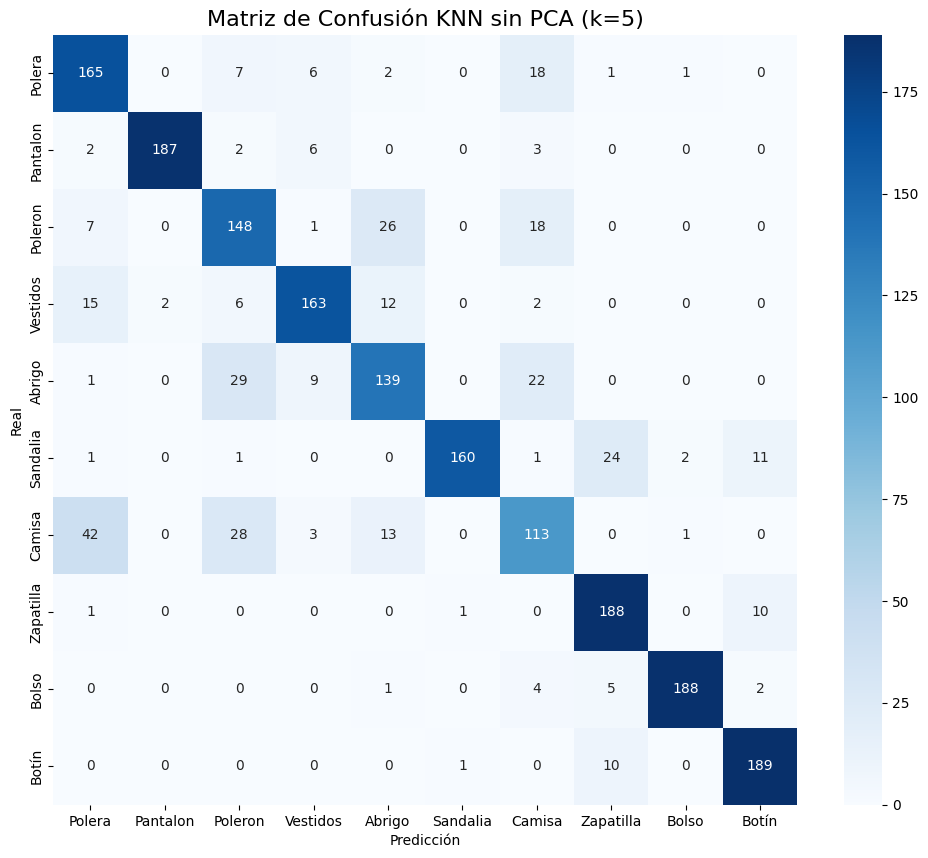

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test2, y_pred_knn2) #Definimos la matriz de confusión
plt.figure(figsize=(12, 10))  #Tamaño de Matriz
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Definimos la matriz
            xticklabels=class_names,  #Eje X
            yticklabels=class_names)  #Eje Y
plt.title('Matriz de Confusión KNN sin PCA (k=5)', fontsize=16)  #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Mostramos la matriz

In [ ]:
incorrect_indices = np.where(y_pred_knn2 != y_test2)[0] #Determinamos la cantidad de fallos
print(f"Fallos: {len(incorrect_indices)}/{len(y_test2)} ({len(incorrect_indices)/len(y_test2):.2%})")
#Mostramos los fallos en cantidad y porcentaje

Fallos: 360/2000 (18.00%)


###### Comparación

Con KNN pasa lo mismo que con SVM, los resultados no cambian tanto, sin embargo si mejora con PCA

#### Mini conclusión

Finalmente observando los tres modelos, se observa que logistic regression es el peor y SVM el mejor en predicción.

En todos los modelos se observa que la matriz de confusión tiene una estructura similar, dejando al bolso como la predicción con menos errores junto con los botines; y por otro lado, gran confusión entre polera, poleron, camisa e incluso abrigo.

### Dataset 2: *mchrishtw/human-activity-recognition-with-smartphones*

In [ ]:
X_reduced = ...  # matriz reducida
y = ...          # etiquetas


In [ ]:
X_reduced = PCA(n_components=10).fit_transform(X_train)

In [ ]:
# En este bloque definimos dos clasificadores: Regresión Logística y Random Forest.
# Luego los organizamos en una lista de tuplas llamada `clfs`, asociando el nombre de cada modelo con su instancia.
# Esta estructura nos permitirá iterar sobre los clasificadores de forma sencilla durante el proceso de entrenamiento y evaluación.
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clfs = [("Logistic Regression", clf_lr), ("Random Forest", clf_rf)]


In [ ]:
# En este bloque definimos tres modelos de regresión distintos: regresión lineal, Ridge y Random Forest.
# Luego, almacenamos cada modelo junto con su nombre en una lista de tuplas llamada `regs`.
# Esta estructura nos permitirá iterar fácilmente sobre los modelos en evaluaciones posteriores y comparar su desempeño.
reg_lr = LinearRegression()
reg_ridge = Ridge(alpha=1.0)
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)

regs = [("LinearRegression", reg_lr),
        ("Ridge", reg_ridge),
        ("RandomForest", reg_rf)]

#### Comparación entre LogisticRegression y Random Forest

In [ ]:
# En este bloque evaluamos el rendimiento de varios clasificadores contenidos en la lista `clfs`.
# Para cada clasificador, entrenamos el modelo con los datos de entrenamiento y realizamos predicciones sobre el conjunto de prueba.
# Calculamos e imprimimos distintas métricas de evaluación para clasificación:
# - Accuracy (exactitud general del modelo)
# - Precision, Recall y F1-score con promedio ponderado (para considerar el desbalance entre clases)
# - Matriz de confusión, que muestra los aciertos y errores por clase
# Estas métricas nos permiten comparar objetivamente el desempeño de los distintos clasificadores.
for name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.9616559212758737
Precision: 0.9631398548242909
Recall: 0.9616559212758737
F1: 0.9615045923584004
Confusion matrix:
 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  10 522   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 406  11]
 [  0   0   0  25   1 445]]
--- Random Forest ---
Accuracy: 0.9267051238547676
Precision: 0.9279653766211432
Recall: 0.9267051238547676
F1: 0.9266309524110475
Confusion matrix:
 [[537   0   0   0   0   0]
 [  0 441  50   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 479   5  12]
 [  0   0   0  16 364  40]
 [  0   0   0  44   6 421]]


In [ ]:
# En este bloque, definimos una función para evaluar el rendimiento de modelos de regresión.
# La función toma como entrada un modelo entrenado y los datos de prueba, realiza las predicciones correspondientes
# y calcula tres métricas de evaluación: MAE (Error Absoluto Medio), RMSE (Raíz del Error Cuadrático Medio)
# y R² (Coeficiente de Determinación). Estas métricas se imprimen para analizar el desempeño del modelo.
def evaluar_regresion(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))


In [ ]:
# Compararemos el rendimiento de dos pipelines de regresión logística
# uno con reducción de dimensionalidad usando PCA y otro sin reducción.
# Para cada pipeline, entrenaré el modelo, realizaré predicciones sobre los datos de prueba
pipe_pca_lr = Pipeline([
    ('pca', PCA(n_components=10)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
pipe_no_red = Pipeline([
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
# y calcularemos la precisión (accuracy). Finalmente, imprimiremos la precisión de cada configuración
# para comparar su desempeño.
pipes = [("PCA + LR", pipe_pca_lr), ("No reduction + LR", pipe_no_red)]

for name, pipe in pipes:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {score:.4f}")


PCA + LR Accuracy: 0.8724
No reduction + LR Accuracy: 0.9617


In [ ]:
results = []

for name, pipe in pipes:

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)


    results.append({
        'model': pipe.steps[-1][0],
        'setting': name,
        'accuracy': score
    })

df = pd.DataFrame(results)


print(df.pivot(index='model', columns='setting', values='accuracy'))

# Evaluamos diferentes pipelines de modelos utilizando los datos de entrenamiento y prueba.
# Para cada pipeline, entrenaré el modelo, haré predicciones y calcularé la precisión (accuracy).
# Luego, guardaré los resultados (modelo, configuración y precisión) en una lista.
# Finalmente, se creara un DataFrame con estos resultados y lo reorganizaré en forma de tabla pivote,
# para comparar fácilmente la precisión de cada modelo bajo diferentes configuraciones.

setting  No reduction + LR  PCA + LR
model                               
clf               0.961656  0.872413


<Axes: xlabel='model', ylabel='accuracy'>

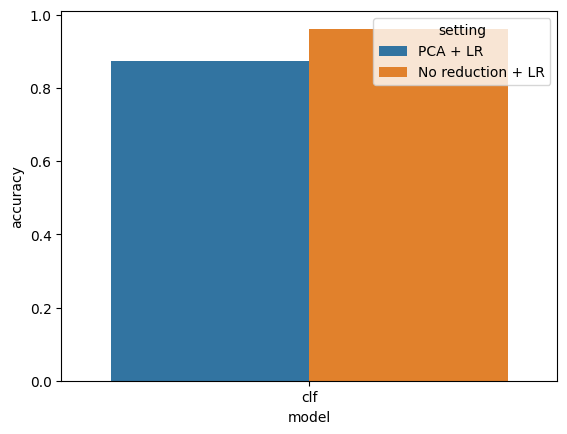

In [ ]:
sns.barplot(data=df, x="model", y="accuracy", hue="setting")
#visualizamos la diferencia entre el PC y el no reducido

De este modo, se obtienen mejores resultados de LinearRegression (LR) para los datos sin reducción por PCA. Además, éste método entrega mejores resultados -en cuanto a precisión, que el de Random Forest (RF). Además, preserva mayores correlaciones entre las variables el método de LR, respecto de el de RF.

### Dataset 3: *wine-quality*

Como ya tenemos de la parte 1.3, la separación de nuestros datos, y el preprocesado, utilizaremos esas mismas variables en nuestro código a continuación.

Lo que haremos será lo siguiente:

1.   Usaremos el modelo de *LogisticRegression* para clasificar nuestros datos, y lo entrenaremos con los datos **con y sin** reducción por LDA.
2.   Usaremos el modelo de *KNeigborsClassifier* para clasificar nuestros datos, y lo entrenaremos con los datos **con y sin** reducción por LDA.
3.   Finalmente, contrastaremos la precisión de cada modelo, en ambos casos.



#### Logistic Regression

Importamos la librería, obviamente:

In [ ]:
from sklearn.linear_model import LogisticRegression

##### Para los datos reducidos por LDA

In [ ]:
logistic_reg = Pipeline([
    ('prep3', prep3),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('logi_reg', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        C=0.1,
        class_weight='balanced'
    ))
])

Ahora, entrenamos el modelo:

In [ ]:
logistic_reg.fit(X3_tr, y3_tr)

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('num3', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('cat3',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                ('logi_reg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Importamos ahora las métricas, para determinar cómo se comporta el modelo:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
pred_lr = logistic_reg.predict(X3_te)
print(classification_report(y3_te, pred_lr))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.31      0.26        48
           5       0.59      0.65      0.62       430
           6       0.54      0.43      0.48       540
           7       0.37      0.34      0.35       228
           8       0.00      0.00      0.00        42
           9       0.01      1.00      0.02         1

    accuracy                           0.47      1293
   macro avg       0.25      0.39      0.25      1293
weighted avg       0.49      0.47      0.48      1293



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Esto nos dice que los vinos que poseen una calidad rondando a la media se predicen con bastante precisión, a diferencia de los que se encuentran en los extremos, o sea, los de baja y alta calidad. En éstos puntos, nuestro modelo presente una evidente debilidad.


In [ ]:
print('Accuracy: ', accuracy_score(y3_te, pred_lr))
print('Precision: ', precision_score(y3_te, pred_lr, average='weighted'))
print('Recall: ', recall_score(y3_te, pred_lr, average='weighted'))
print('f1_score: ', f1_score(y3_te, pred_lr, average='weighted'))
#print('roc_auc_score: ', roc_auc_score(y3_te, pred_lr))

Accuracy:  0.4671307037896365
Precision:  0.494144506595358
Recall:  0.4671307037896365
f1_score:  0.4769325259353589


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Construyamos ahora un modelo que no utilice las variables reducidas, es decir, sin el LDA:

##### Para los datos sin reducción por LDA

Para ello, construímos nuestro Pipeline, esta vez, sin considerar la reducción por LDA:

In [ ]:
logistic_reg_origin = Pipeline([
    ('prep3', prep3),
    ('logi_reg', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        C=0.1,
        class_weight='balanced'
    ))
])

Y entrenamos el modelo con las variables originales:

In [ ]:
logistic_reg_origin.fit(X3_tr, y3_tr)

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('num3', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('cat3',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('logi_reg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

###### Comparación de ambos casos:

In [ ]:
pred_lr_origin = logistic_reg_origin.predict(X3_te)
print('el modelo entrenado com las var originales sin LDA satisface:','\n')
print(classification_report(y3_te, pred_lr_origin))
print('\n','el modelo entrenado con las var reducidas con LDA satisface:','\n')
print(classification_report(y3_te, pred_lr))

el modelo entrenado com las var originales sin LDA satisface: 

              precision    recall  f1-score   support

           3       0.04      0.50      0.08         4
           4       0.22      0.33      0.27        48
           5       0.59      0.59      0.59       430
           6       0.52      0.40      0.45       540
           7       0.38      0.39      0.39       228
           8       0.08      0.12      0.10        42
           9       0.03      1.00      0.05         1

    accuracy                           0.45      1293
   macro avg       0.27      0.48      0.27      1293
weighted avg       0.49      0.45      0.47      1293


 el modelo entrenado con las var reducidas con LDA satisface: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.31      0.26        48
           5       0.59      0.65      0.62       430
           6       0.54      0.43      0.48       540
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Accuracy: ', accuracy_score(y3_te, pred_lr_origin))
print('Precision: ', precision_score(y3_te, pred_lr_origin, average='weighted'))
print('Recall: ', recall_score(y3_te, pred_lr_origin, average='weighted'))
print('f1_score: ', f1_score(y3_te, pred_lr_origin, average='weighted'))

Accuracy:  0.45011600928074247
Precision:  0.4924941547153986
Recall:  0.45011600928074247
f1_score:  0.4662438117097462


Notamos de esta manera, que el modelo de *LogisticRegression* posee -en promedio- una mayor precisión en las predicciones cuando se trabaja con las variables originales (i.e., sin reducción por LDA).

Ahora, como nos falta probar otro modelo de clasificación, utilicemos:

#### KNeighborsClassifier

Importamos la librería:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##### Para los datos reducidos por LDA

In [ ]:
knn_lda = Pipeline([
    ('prep3', prep3),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('knn', KNeighborsClassifier(
        n_neighbors=2,
        p=2,
        metric='minkowski'
    ))
])

Y entrenamos el modelo con nuestros datos:

In [ ]:
knn_lda.fit(X3_tr, y3_tr)

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('num3', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('cat3',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

Y generamos nuestra predicción:

In [ ]:
pred_knn_lda = knn_lda.predict(X3_te)

##### Para los datos sin reducción por LDA

In [ ]:
knn_origin = Pipeline([
    ('prep3', prep3),
    ('knn', KNeighborsClassifier(
        n_neighbors=2,
        p=2,
        metric='minkowski'
    ))
])

In [ ]:
knn_origin.fit(X3_tr, y3_tr)

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('num3', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('cat3',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
pred_knn_origin = knn_origin.predict(X3_te)

###### Comparación de ambos casos:

In [ ]:
print('el modelo entrenado com las var originales sin LDA satisface:','\n')
print(classification_report(y3_te, pred_knn_origin))
print('\n','el modelo entrenado com las var reducidas con LDA satisface:','\n')
print(classification_report(y3_te, pred_knn_lda))

el modelo entrenado com las var originales sin LDA satisface: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.15      0.19      0.16        48
           5       0.56      0.73      0.63       430
           6       0.58      0.56      0.57       540
           7       0.63      0.39      0.48       228
           8       0.44      0.10      0.16        42
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1293
   macro avg       0.34      0.28      0.29      1293
weighted avg       0.56      0.55      0.54      1293


 el modelo entrenado com las var reducidas con LDA satisface: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.18      0.23      0.20        48
           5       0.54      0.75      0.63       430
           6       0.58      0.54      0.56       540
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Notamos que, para éste tipo de clasificación, ambos modelos presentan una precisión promedio similares; por otro lado, el modelo entrenado con las variables sin LDA abarca un poco más de las features (es decir, los valores de la variable *quality*) que el modelo entrenado con las variables reducidas.

De esta manera, el modelo se comporta mejor sin reducción de dimensionalidad.

#### Mini-conclusión

En ambos casos, la reducción de dimensionalidad no generó ninguna mejoría significativa en la precisión de los modelos utilidados, *logisticRegression* y *KNeighborsClassifier*.

En éste último, se obtuvieron resultados más prometedores con *k_neighbors = 2* que con valores más altos.

Finalmente, el modelo que mejor desempeño obtuvo fue el de *KNeighborsClassifier*, pues sus valores de precisión -por ejemplo- fueron bastante más altos que los del otro modelo.

### Dataset 4: *credit-card-fraud*

In [ ]:
#Cargamos librerías
import numpy as np  #Para calculos
import pandas as pd #Para leer dataset
from sklearn.linear_model import LogisticRegression #Scikit learn para regresión lineal
from sklearn.model_selection import train_test_split  #Scikit learn para entrnamiento de modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  #Scikit learn para metricas
import matplotlib.pyplot as plt #Matplot para graficar
import seaborn as sns #Ayuda a graficar mapa de calor
import time as time #Importamos tiempo

#### Logistic regression

In [ ]:
#Definimos modelo de regresion lineal
lr_params = {
    'penalty': 'l2',  #Regulación L2
    'C': 0.1, #Aumentamos el sesgo
    'solver': 'saga', #Optimiza el algoritmo
    'max_iter': 1000, #Maximo de iteraciones
    'class_weight': 'balanced', #Ajusta el peso de las clases
    'random_state': 42, #Fijamos semilla
    'n_jobs': -1  #Acelera el procesamiento
}

Se decide usar TSNE en vez de UMAP debido a lo que se mencionó anteriormente sobre UMAP, en la gráfica de TSNE se ve mejor la diferencia entre fraude y no fraude, en comparación con UMAP que se ve más disperso el fraude. Es por ello que se decide usar TSNE con la esperanza de mejorar la predicción.

##### Con TSNE

In [ ]:
#Separamos datos para entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X_tsne, y,  #Definimos datos para entrenar
    test_size=0.2,  #Hacemos la proporción 80-20
    stratify=y, #Mantenemos proporcion en fraude y no fraude
    random_state=42 #Fijamos semilla
)

In [ ]:
import time as time
start_time = time.time() #Mide el tiempo
lr_model = LogisticRegression(**lr_params)  #Definimos el modelo
lr_model.fit(X_train, y_train)  #Entrenamos el modelo
print(f"Tiempo de entrenamiento: {(time.time()-start_time)/60:.2f} minutos") #Tiempo en que se entrena

Tiempo de entrenamiento: 0.90 minutos


In [ ]:
y_pred = lr_model.predict(X_test) #Aplica el modelo
y_proba = lr_model.predict_proba(X_test)[:, 1]  #Calcula la probabilidad de fraude

In [ ]:
print("Reporte:")
print(classification_report(y_test, y_pred))  #Imprime reporte

Reporte:
              precision    recall  f1-score   support

           0       1.00      0.63      0.78     56864
           1       0.00      0.92      0.01        98

    accuracy                           0.64     56962
   macro avg       0.50      0.78      0.39     56962
weighted avg       1.00      0.64      0.78     56962



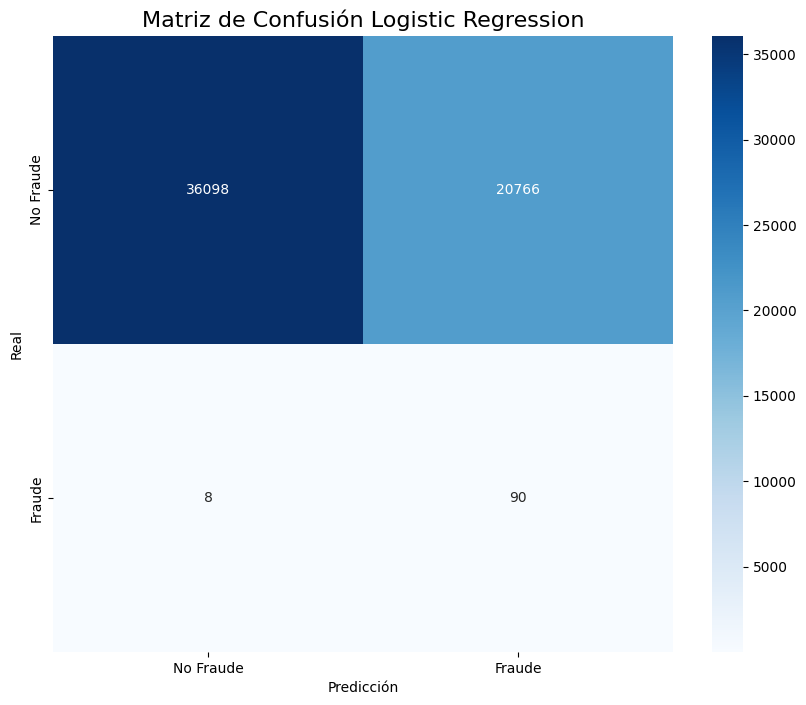

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred) #Definimos las variables
plt.figure(figsize=(10, 8)) #Tamaño de gráfica
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Tono de la matriz
            xticklabels=['No Fraude', 'Fraude'],  #Eje X
            yticklabels=['No Fraude', 'Fraude'])  #Eje Y
plt.title('Matriz de Confusión Logistic Regression', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Muestra la Matriz

##### Sin TSNE

In [ ]:
#Separamos datos para entrenar el modelo
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y,  #Definimos datos para entrenar
    test_size=0.2,  #Hacemos la proporción 80-20
    stratify=y, #Mantenemos proporcion en fraude y no fraude
    random_state=42 #Fijamos semilla
)

In [ ]:
start_time = time.time() #Mide el tiempo
lr_model = LogisticRegression(**lr_params)  #Definimos el modelo
lr_model.fit(X_train2, y_train2)  #Entrenamos el modelo
print(f"Tiempo de entrenamiento: {(time.time()-start_time)/60:.2f} minutos") #Tiempo en que se entrena

Tiempo de entrenamiento: 2.88 minutos


In [ ]:
y_pred2 = lr_model.predict(X_test2) #Aplica el modelo
y_proba2 = lr_model.predict_proba(X_test2)[:, 1]  #Calcula la probabilidad de fraude

In [ ]:
print("Reporte:")
print(classification_report(y_test2, y_pred2))  #Imprime reporte

Reporte:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



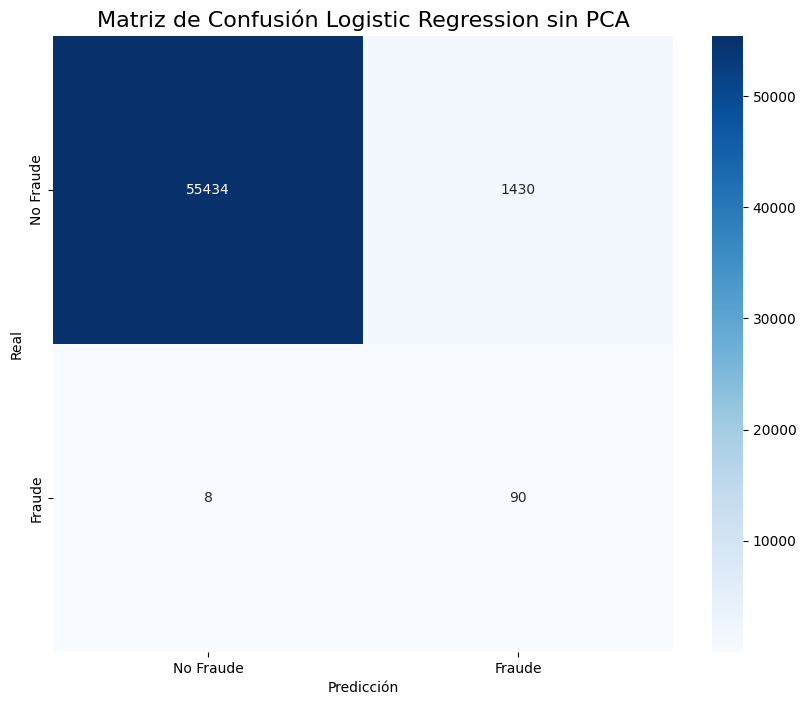

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test2, y_pred2) #Definimos las variables
plt.figure(figsize=(10, 8)) #Tamaño de gráfica
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',  #Tono de la matriz
            xticklabels=['No Fraude', 'Fraude'],  #Eje X
            yticklabels=['No Fraude', 'Fraude'])  #Eje Y
plt.title('Matriz de Confusión Logistic Regression sin TSNE', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Muestra la Matriz

###### Comparación

Podemos ver en la matriz de confusión que el modelo funciona mucho mejor sin aplicar TSNE, esto dado que solo se tienen 1400 no fraudes que se catalogan como fraude, en cambio con TSNE hay 20000.

#### Random Forest

In [ ]:
#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier  #Importamos Random Forest

##### Sin procesar

Se decide usar los datos sin procesar ya que Random Fores trabaja mejor con datos en bruto, sin TSNE y sin escalar incluso.

In [ ]:
#Definimos entrenamiento y predicción
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #Usamos el data set sin procesar
    test_size=0.2,  #Mantenemos proporción 80-20
    stratify=y, #Mantiene proporción de fraude y no fraude
    random_state=42 #Fijamos semilla
)

In [ ]:
#Calculamos pesos de hojas
from sklearn.utils import class_weight  #Importamos la función de calculo de pesos
class_weights = class_weight.compute_class_weight(
    'balanced', #Fórmula que asigna pesos
    classes=np.unique(y_train), #Clases
    y=y_train #Valores de entrenamiento
)
weights = {0: class_weights[0], 1: class_weights[1]}  #Crea y distribuye los pesos

In [ ]:
#Definimos el modelo
rf_params = {
    'n_estimators': 200,  #Número de Árboles
    'criterion': 'gini',  #Mide calidad de árboles
    'max_depth': 15,  #Profundidad
    'min_samples_split': 10,  #Mínimo para dividir nodo
    'min_samples_leaf': 5,  #Mínimo por hoja
    'max_features': 'sqrt', #Número de features, usa raíz cuadrada
    'class_weight': weights,  #Asignamos los pesos según la función anterior
    'n_jobs': -1, #Optimiza
    'random_state': 42, #Semilla
}

In [ ]:
#Aplicamos modelo
start_time = time.time() #Mide el tiempo
rf_model = RandomForestClassifier(**rf_params)  #Definimos modelo
rf_model.fit(X_train, y_train)  #Entrenamos modelo
print(f"Tiempo de entrenamiento: {(time.time()-start_time)/60:.2f} minutos") #Tiempo de entrenamiento

Tiempo de entrenamiento: 4.18 minutos


In [ ]:
#Evaluamos el modelo
y_pred = rf_model.predict(X_test) #Aplicamos modelo
y_proba = rf_model.predict_proba(X_test)[:, 1]  #Probabilidad de Fraude
print("Reporte:")
print(classification_report(y_test, y_pred))  #Reporte

Reporte:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Vemos metrica ROC-AUC
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}") #Qué tanto distingue las clases

ROC-AUC: 0.9824


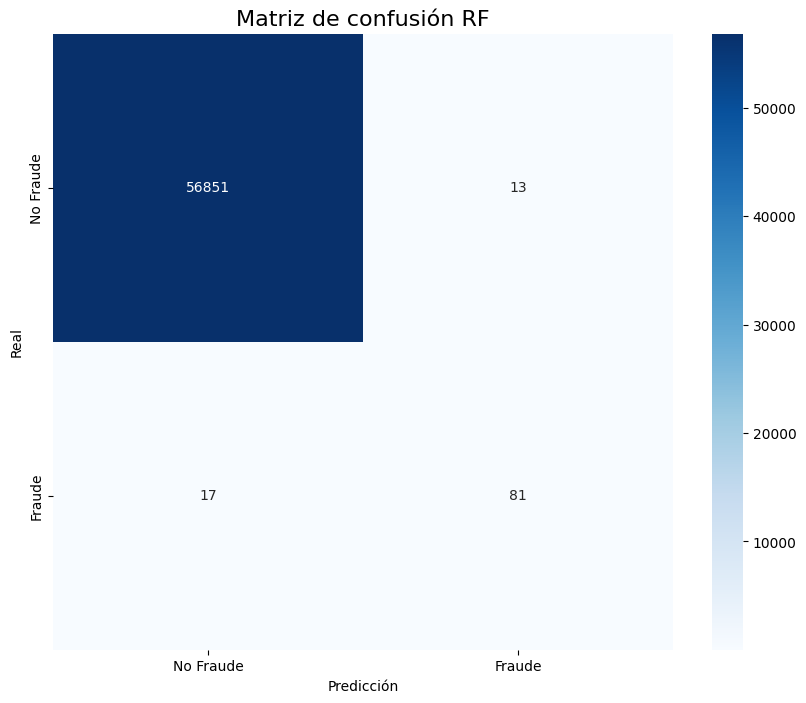

In [ ]:
#Matriz de confusión
plt.figure(figsize=(10, 8)) #Tamaño de gráfica
sns.heatmap(
    confusion_matrix(y_test, y_pred), #Definimos las variables de la matriz
    annot=True, #Valores sobre el gráfico
    fmt='d',  #Formato de números
    cmap='Blues', #Color azul
    xticklabels=['No Fraude', 'Fraude'],  #Eje X
    yticklabels=['No Fraude', 'Fraude'] #Eje Y
)
plt.title('Matriz de confusión RF', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Grafica

##### Con TSNE

In [ ]:
#Definimos entrenamiento y predicción
X_train, X_test, y_train, y_test = train_test_split(
    X_tsne, y, #Usamos el data set sin procesar
    test_size=0.2,  #Mantenemos proporción 80-20
    stratify=y, #Mantiene proporción de fraude y no fraude
    random_state=42 #Fijamos semilla
)

In [ ]:
#Calculamos pesos de hojas
from sklearn.utils import class_weight  #Importamos la función de calculo de pesos
class_weights = class_weight.compute_class_weight(
    'balanced', #Fórmula que asigna pesos
    classes=np.unique(y_train), #Clases
    y=y_train #Valores de entrenamiento
)
weights = {0: class_weights[0], 1: class_weights[1]}  #Crea y distribuye los pesos

In [ ]:
#Definimos el modelo
rf_params = {
    'n_estimators': 200,  #Número de Árboles
    'criterion': 'gini',  #Mide calidad de árboles
    'max_depth': 15,  #Profundidad
    'min_samples_split': 10,  #Mínimo para dividir nodo
    'min_samples_leaf': 5,  #Mínimo por hoja
    'max_features': 'sqrt', #Número de features, usa raíz cuadrada
    'class_weight': weights,  #Asignamos los pesos según la función anterior
    'n_jobs': -1, #Optimiza
    'random_state': 42, #Semilla
}

In [ ]:
#Aplicamos modelo
start_time = time.time() #Mide el tiempo
rf_model = RandomForestClassifier(**rf_params)  #Definimos modelo
rf_model.fit(X_train, y_train)  #Entrenamos modelo
print(f"Tiempo de entrenamiento: {(time.time()-start_time)/60:.2f} minutos") #Tiempo de entrenamiento

Tiempo de entrenamiento: 0.97 minutos


In [ ]:
#Evaluamos el modelo
y_pred = rf_model.predict(X_test) #Aplicamos modelo
y_proba = rf_model.predict_proba(X_test)[:, 1]  #Probabilidad de Fraude
print("Reporte:")
print(classification_report(y_test, y_pred))  #Reporte

Reporte:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.80      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Vemos metrica ROC-AUC
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}") #Qué tanto distingue las clases

ROC-AUC: 0.9361


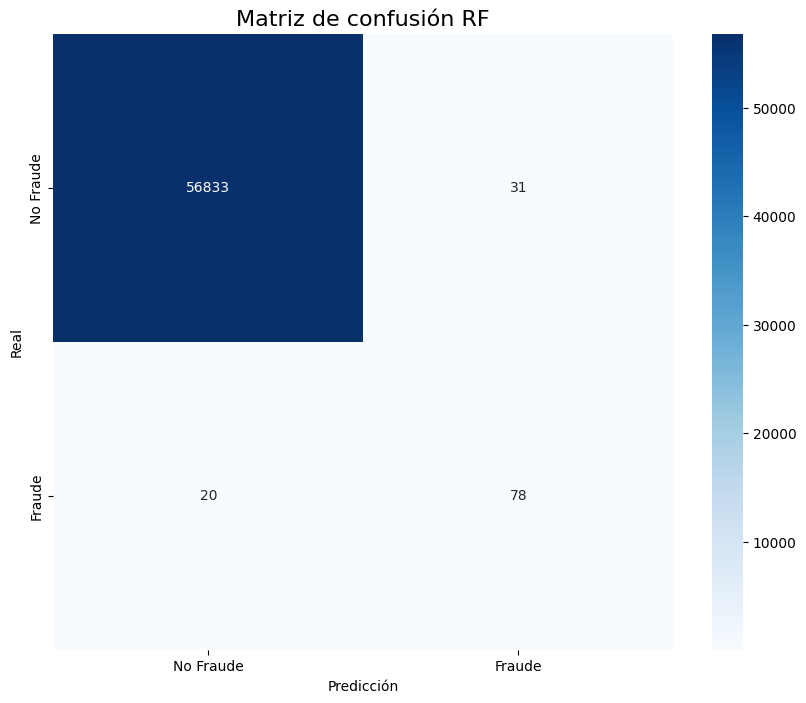

In [ ]:
#Matriz de confusión
plt.figure(figsize=(10, 8)) #Tamaño de gráfica
sns.heatmap(
    confusion_matrix(y_test, y_pred), #Definimos las variables de la matriz
    annot=True, #Valores sobre el gráfico
    fmt='d',  #Formato de números
    cmap='Blues', #Color azul
    xticklabels=['No Fraude', 'Fraude'],  #Eje X
    yticklabels=['No Fraude', 'Fraude'] #Eje Y
)
plt.title('Matriz de confusión RF', fontsize=16) #Título
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()  #Grafica

###### Comparación

Notamos que al igual que en logistic regression el modelo funciona mucho mejor que con datos sin procesar. sin embargo aquí la diferencia es sustancialmente más baja.

#### Mini Conclusión

En este caso, podemos ver que los modelos funcionan mucho mejor con los datos sin procesar, incluso notemos que el TSNE demora 1 hora, por lo que es hasta más costoso realizarlo. Por tanto de aquí se concluye que en este caso no se necesita procesar los datos y además el modelo de Random Fores es mucho más preciso.

### Dataset 5: *uci-ml/energy-efficiency*

Vamos a utilizar los siguientes modelos supervisados: LinearRegression y Ridge. Para ello, importamos lo necesario

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### LinearRegression (sin PCA)


Lo primero que hacemos es un *train_tests_split* de los datos originales, sin reducción PCA, pero escalados.

In [ ]:
X5_tr, X5_te, y5_tr, y5_te = train_test_split(X5_scaled, y5, test_size=0.2, random_state=42)

Ahora construímos el modelo de regresión lineal para nuestros datos:

In [ ]:
lin_reg = Pipeline([
    ('lin_reg', LinearRegression())
])

Y lo entrenamos:

In [ ]:
lin_reg.fit(X5_tr, y5_tr)

Pipeline(steps=[('lin_reg', LinearRegression())])

Así, ahora generamos nuestra predicción:

In [ ]:
pred_lin_reg = lin_reg.predict(X5_te)

#### LinearRegression (con PCA)

Nuevamente, realizamos un *train_test_split* de nuestros datos, sin embargo, esta vez utilizaremos nuestros datos **ya reducidos** por PCA:

In [ ]:
X5_tr2, X5_te2, y5_tr2, y5_te2 = train_test_split(X5_pca, y5, test_size=0.2, random_state=42)

Y entrenamos nuestro modelo, con éstos nuevos datos:

In [ ]:
lin_reg.fit(X5_tr2, y5_tr2)

Pipeline(steps=[('lin_reg', LinearRegression())])

Y generamos así, una nueva predicción:

In [ ]:
pred_lin_reg_2 = lin_reg.predict(X5_te2)

##### Comparación de ambos casos:

Comparemos las métricas asociadas a ambas predicciones. Primero, definimos la función para la RMSE, e importamos las métricas que vamos a analizar:

In [ ]:
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Ahora, observamos los resultados asociados a ambas predicciones:

In [ ]:
print("valores de las metricas para LinReg sin PCA:",'\n')
print("MAE :", mean_absolute_error(y5_te,pred_lin_reg))
print("RMSE:", rmse(y5_te,pred_lin_reg))
print("R²  :", r2_score(y5_te,pred_lin_reg),'\n')

print("valores de las metricas para LinReg con PCA:",'\n')
print("MAE :", mean_absolute_error(y5_te2,pred_lin_reg_2))
print("RMSE:", rmse(y5_te2,pred_lin_reg_2))
print("R²  :", r2_score(y5_te2,pred_lin_reg_2))

valores de las metricas para LinReg sin PCA: 

MAE : 2.1886711163218964
RMSE: 3.0859857017772154
R²  : 0.9027048110077099 

valores de las metricas para LinReg con PCA: 

MAE : 3.192314221424766
RMSE: 4.348891687448376
R²  : 0.8074718096304907


Como estamos realizando una regresión lineal, el resultado que más nos entrega información sobre la calidad de nuestras predicciones corresponde al de R^2.

Para los datos sin reducción PCA, ésta variable alcanza un valor de aproximadamente 0.9, que es más alto que el del modelo para los datos con reducción PCA (aproximadamente 0.8). De ésto, concluímos que para la regresión lineal, trabajar con nuestros datos sin reducción PCA entrega una predicción más precisa.

#### Ridge (sin PCA)

Construímos nuestro modelo de Ridge:

In [ ]:
ridge_5 = Pipeline([
        ("ridge", Ridge(alpha=10, random_state=42))
        ])

Entrenamos nuestro modelo. En virtud de la memoria, y de la simpleza de nuestro código, como ya hemos generado 2 "divisiones" de nuestros datos **con y sin** reducción PCA, utilizaremos dichas "divisiones".

De modo que ahora, entrenaremos el modelo con nuestras particiones de los datos originales, únicamente escalados:

In [ ]:
ridge_5.fit(X5_tr, y5_tr)

Pipeline(steps=[('ridge', Ridge(alpha=10, random_state=42))])

Generamos entonces nuestra predicción:

In [ ]:
pred_ridge5 = ridge_5.predict(X5_te)

#### Ridge (con PCA)


Al igual que antes, ésta vez entrenamos nuestro modelo de Ridge con los datos reducidos por PCA:

In [ ]:
ridge_5.fit(X5_tr2, y5_tr2)

Pipeline(steps=[('ridge', Ridge(alpha=10, random_state=42))])

Y generamos nuestra predicción:

In [ ]:
pred_ridge5_2 = ridge_5.predict(X5_te2)

##### Comparación de ambos casos

Veamos qué tanta precisión existe en el modelo de Ridge, para los datos con y sin reducción por PCA.

In [ ]:
print("valores de las metricas para Ridge sin PCA:",'\n')
print("MAE :", mean_absolute_error(y5_te2,pred_ridge5))
print("RMSE:", rmse(y5_te2,pred_ridge5))
print("R²  :", r2_score(y5_te2,pred_ridge5),'\n')

print("valores de las metricas para Ridge con PCA:",'\n')
print("MAE :", mean_absolute_error(y5_te2,pred_ridge5_2))
print("RMSE:", rmse(y5_te2,pred_ridge5_2))
print("R²  :", r2_score(y5_te2,pred_ridge5_2))

valores de las metricas para Ridge sin PCA: 

MAE : 2.249989226478361
RMSE: 3.1826823910911743
R²  : 0.8964837993958323 

valores de las metricas para Ridge con PCA: 

MAE : 3.1901272527872435
RMSE: 4.351362895906984
R²  : 0.8072539451700905


En este caso, observamos resultados muy similares a los del modelo de regresión lineal, por lo que se llega a la misma conclusión: trabajar con nuestros datos sin reducción PCA entrega una predicción más precisa.

## Reflexión general

Para el dataset 1: *zalando-research/fashionmnist*, se aprecia que pese a que la reducción no es una reducción relevante, dado que se pierden pocos parámetros, esta si resulta útil para entrenar el modelo, dando así una mejor predicción, destacando el modelo SVM.

Para el dataset 2: *mchrishtw/human-activity-recognition-with-smartphones*, se obtienen mejores resultados con LogisticRegression (respecto a RandomForest) con las variables originales, es decir, sin reducción por PCA.

En lo que respecta al dataset 3: *wine-quality*, obtenemos resultados relativamente mejores cuando entrenamos los modelos de LogisticRegression y KNeighborsClassifier con las variables originales (sin reducción), lo cual es útil a la hora de trabajar con datos similares, pues corresponde a ahorros de memoria y costos (al aplicar las reducciones). En este contexto, según nuestros resultados conviene trabajar con KNeighborsClassifier.

Para el dataset 4: *credit-card-fraud*, se obtiene que el realizar la reducción no es para nada útil ya que se pierde tiempo y el modelo es menos efectivo, haciendo uso de random forest y con los datos sin tratar se obtuvieron los mejores resultados.


Para el dataset 5: *energy-efficiency* se obtienen resultados similares que en el dataset 3; para un modelo de LinearRegression, la precisión del modelo no depende en demasía de la reducción por PCA, al contrario del modelo de Rigde, que sí presenta una mejoría más significativa cuando se trabaja con las variables sin reducir. En este contexto, según nuestros resultados conviene trabajar con LinearRegression.\n"

Finalmente, obtenemos -en términos generales- mejores resultados al trabajar nuestros datos sin reducción. Sin embargo, ésto se puede deber a que los "data-sets" estudiados son, relativamente, pequeños.

Es posible, además, que dadas las estructuras internas de los datos, y el cómo se recopilaron, provoquen efectos a la hora de realizar reducciones, tales como el que hemos mencionado anteriormente. ¿Qué pasará con datos que no siguen un "orden" establecido, o son dispersos, o simplemente poseen errores de mediciones, que a priori, **sí** conocemos? ¿Allí las reducciones serán necesarias? ¿Entregarán mejores resultados? Estas son preguntas que nos surgen luego de analizar los resultados obtenidos y, que en otra ocasión, podrían ser estudiadas por el equipo, puesto que -a priori- asumimos que los datos trabajados son correctos y coherentes.